# CS 182 Final Project: Architecture Comparison for ICL on Finite State Machines

**Team:** Trenton O'Bannon, Yuri Lee, Keshab Agarwal, Evan Davis

This notebook analyzes the **completed experimental results** comparing **Vanilla RNN** and **LSTM** architectures on In-Context Learning (ICL) tasks for finite state machines.

## Completed Experiments

We have completed comprehensive experiments testing:

1. **Direct Training** on complex FSMs (5 states, 4-5 actions)
2. **Curriculum Learning** (2-stage: simple 3-state FSMs → complex 5-state FSMs)
3. **Architecture Comparison** (Vanilla RNN vs LSTM)

## Key Results Summary

| Architecture | Direct Training | Curriculum Stage 1 (Simple) | Curriculum Stage 2 (Complex) |
|--------------|-----------------|----------------------------|------------------------------|
| **LSTM** | 99.85% | 99.68% | 98.82% |
| **Vanilla RNN** | 53.66% | 41.29% | 20.73% |

## Research Questions

- **Q1:** Do RNNs/LSTMs need curriculum learning like Transformers do for ICL?
- **Q2:** Which architecture is more robust for FSM ICL?
- **Q3:** Does curriculum learning help or hurt different architectures?
- **Q4:** What explains the massive performance gap between LSTM and Vanilla RNN?

In [3]:
# Import Required Libraries and Setup
import sys
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List
import json

# Set style for better plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully")
print("📊 Ready to analyze experimental results")

✅ Libraries imported successfully
📊 Ready to analyze experimental results


In [4]:
# Load Actual Experimental Results from JSON files
from pathlib import Path

metrics_dir = Path('../../checkpoints/training_logs')

# Helper function to load metrics
def load_metrics(filename):
    filepath = metrics_dir / filename
    with open(filepath, 'r') as f:
        return json.load(f)

# Load all experimental results
lstm_direct = load_metrics('lstm_direct_20251125_041044_metrics.json')
lstm_curriculum_stage1 = load_metrics('lstm_curriculum_stage1_20251125_034803_metrics.json')
lstm_curriculum_stage2 = load_metrics('lstm_curriculum_stage2_20251125_084540_metrics.json')

rnn_direct = load_metrics('vanilla_rnn_direct_20251125_044821_metrics.json')
rnn_curriculum_stage1 = load_metrics('vanilla_rnn_curriculum_stage1_20251125_040452_metrics.json')
rnn_curriculum_stage2 = load_metrics('vanilla_rnn_curriculum_stage2_20251125_144028_metrics.json')

# Organize results
results = {
    'LSTM': {
        'direct': {
            'test_accuracy': lstm_direct['final_results']['test_accuracy'],
            'val_accuracy': lstm_direct['final_results']['val_accuracy'],
            'train_losses': lstm_direct['training_history']['train_losses'],
            'val_losses': lstm_direct['training_history']['val_losses'],
            'train_accs': lstm_direct['training_history']['train_accs'],
            'val_accs': lstm_direct['training_history']['val_accs'],
            'epochs': len(lstm_direct['training_history']['train_losses'])
        },
        'curriculum_stage1': {
            'test_accuracy': lstm_curriculum_stage1['final_results']['test_accuracy'],
            'val_accuracy': lstm_curriculum_stage1['final_results']['val_accuracy'],
            'train_losses': lstm_curriculum_stage1['training_history']['train_losses'],
            'val_losses': lstm_curriculum_stage1['training_history']['val_losses'],
            'train_accs': lstm_curriculum_stage1['training_history']['train_accs'],
            'val_accs': lstm_curriculum_stage1['training_history']['val_accs'],
            'epochs': len(lstm_curriculum_stage1['training_history']['train_losses']),
            'dataset': 'Simple FSM (3 states, 3 actions)'
        },
        'curriculum_stage2': {
            'test_accuracy': lstm_curriculum_stage2['final_results']['test_accuracy'],
            'val_accuracy': lstm_curriculum_stage2['final_results']['val_accuracy'],
            'train_losses': lstm_curriculum_stage2['training_history']['train_losses'],
            'val_losses': lstm_curriculum_stage2['training_history']['val_losses'],
            'train_accs': lstm_curriculum_stage2['training_history']['train_accs'],
            'val_accs': lstm_curriculum_stage2['training_history']['val_accs'],
            'epochs': len(lstm_curriculum_stage2['training_history']['train_losses']),
            'dataset': 'Complex FSM (5 states, 4-5 actions)'
        }
    },
    'Vanilla RNN': {
        'direct': {
            'test_accuracy': rnn_direct['final_results']['test_accuracy'],
            'val_accuracy': rnn_direct['final_results']['val_accuracy'],
            'train_losses': rnn_direct['training_history']['train_losses'],
            'val_losses': rnn_direct['training_history']['val_losses'],
            'train_accs': rnn_direct['training_history']['train_accs'],
            'val_accs': rnn_direct['training_history']['val_accs'],
            'epochs': len(rnn_direct['training_history']['train_losses']),
            'dataset': 'Complex FSM (5 states, 4-5 actions)'
        },
        'curriculum_stage1': {
            'test_accuracy': rnn_curriculum_stage1['final_results']['test_accuracy'],
            'val_accuracy': rnn_curriculum_stage1['final_results']['val_accuracy'],
            'train_losses': rnn_curriculum_stage1['training_history']['train_losses'],
            'val_losses': rnn_curriculum_stage1['training_history']['val_losses'],
            'train_accs': rnn_curriculum_stage1['training_history']['train_accs'],
            'val_accs': rnn_curriculum_stage1['training_history']['val_accs'],
            'epochs': len(rnn_curriculum_stage1['training_history']['train_losses']),
            'dataset': 'Simple FSM (3 states, 3 actions)'
        },
        'curriculum_stage2': {
            'test_accuracy': rnn_curriculum_stage2['final_results']['test_accuracy'],
            'val_accuracy': rnn_curriculum_stage2['final_results']['val_accuracy'],
            'train_losses': rnn_curriculum_stage2['training_history']['train_losses'],
            'val_losses': rnn_curriculum_stage2['training_history']['val_losses'],
            'train_accs': rnn_curriculum_stage2['training_history']['train_accs'],
            'val_accs': rnn_curriculum_stage2['training_history']['val_accs'],
            'epochs': len(rnn_curriculum_stage2['training_history']['train_losses']),
            'dataset': 'Complex FSM (5 states, 4-5 actions)'
        }
    }
}

print("✅ Experimental results loaded from JSON files")
print("\n📊 Summary:")
for arch in results:
    print(f"\n{arch}:")
    print(f"  Direct Training:     {results[arch]['direct']['test_accuracy']:.2%} ({results[arch]['direct']['epochs']} epochs)")
    print(f"  Curriculum Stage 1:  {results[arch]['curriculum_stage1']['test_accuracy']:.2%} ({results[arch]['curriculum_stage1']['epochs']} epochs)")
    print(f"  Curriculum Stage 2:  {results[arch]['curriculum_stage2']['test_accuracy']:.2%} ({results[arch]['curriculum_stage2']['epochs']} epochs)")

✅ Experimental results loaded from JSON files

📊 Summary:

LSTM:
  Direct Training:     99.85% (16 epochs)
  Curriculum Stage 1:  99.68% (16 epochs)
  Curriculum Stage 2:  98.82% (12 epochs)

Vanilla RNN:
  Direct Training:     53.66% (20 epochs)
  Curriculum Stage 1:  41.29% (20 epochs)
  Curriculum Stage 2:  20.73% (20 epochs)


## Visualization 1: Main Performance Comparison

/var/folders/sk/z_zk99l17n56987x_nykljmr0000gn/T/ipykernel_71988/4056766148.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(architectures, fontsize=12)


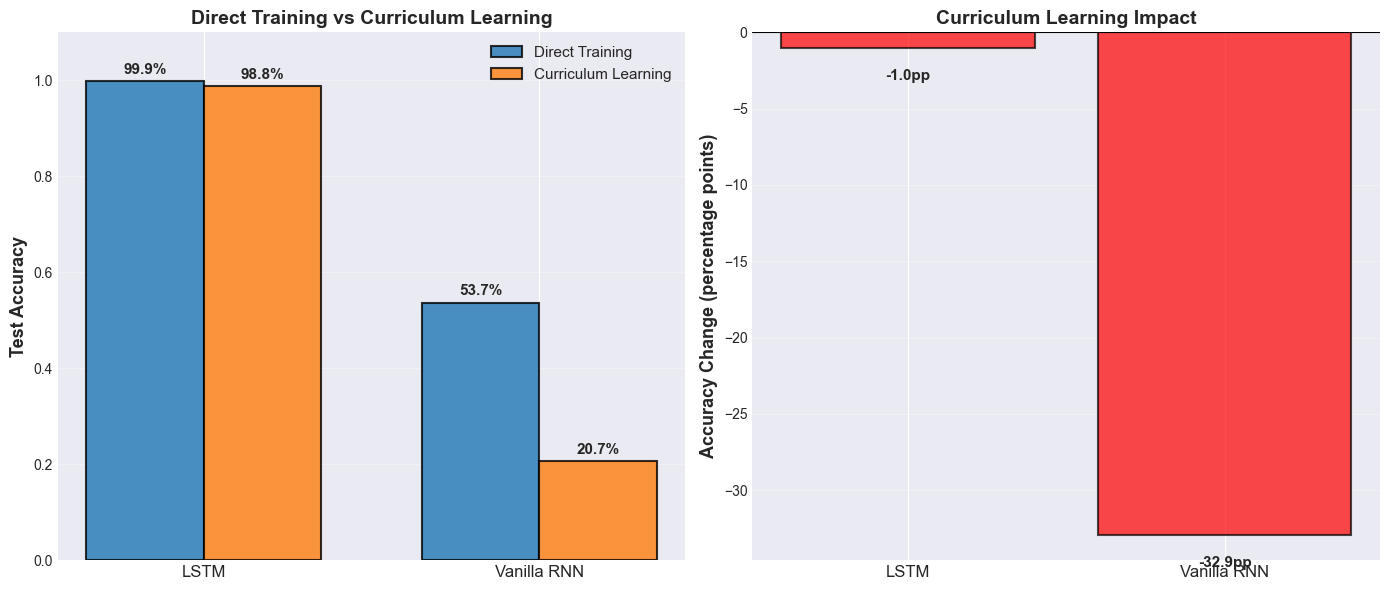

📊 Key Finding:
  LSTM:       Curriculum learning changes accuracy by -1.03 percentage points
  Vanilla RNN: Curriculum learning changes accuracy by -32.93 percentage points


In [3]:
# Create Main Comparison Bar Chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Chart 1: Direct Training vs Curriculum Learning
architectures = ['LSTM', 'Vanilla RNN']
direct_scores = [results['LSTM']['direct']['test_accuracy'], 
                 results['Vanilla RNN']['direct']['test_accuracy']]
curriculum_scores = [results['LSTM']['curriculum_stage2']['test_accuracy'],
                    results['Vanilla RNN']['curriculum_stage2']['test_accuracy']]

x = np.arange(len(architectures))
width = 0.35

bars1 = ax1.bar(x - width/2, direct_scores, width, label='Direct Training',
                color='#1f77b4', alpha=0.8, edgecolor='black', linewidth=1.5)
bars2 = ax1.bar(x + width/2, curriculum_scores, width, label='Curriculum Learning',
                color='#ff7f0e', alpha=0.8, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{height:.1%}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=11, fontweight='bold')

ax1.set_ylabel('Test Accuracy', fontsize=13, fontweight='bold')
ax1.set_title('Direct Training vs Curriculum Learning', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(architectures, fontsize=12)
ax1.legend(fontsize=11)
ax1.set_ylim(0, 1.1)
ax1.grid(True, alpha=0.3, axis='y')

# Chart 2: Curriculum Learning Effect (Improvement)
improvements = [
    (curriculum_scores[0] - direct_scores[0]) * 100,  # LSTM improvement in percentage points
    (curriculum_scores[1] - direct_scores[1]) * 100   # Vanilla RNN improvement
]

colors = ['green' if imp > 0 else 'red' for imp in improvements]
bars = ax2.bar(architectures, improvements, color=colors, alpha=0.7, 
               edgecolor='black', linewidth=1.5)

# Add value labels
for bar, imp in zip(bars, improvements):
    height = bar.get_height()
    ax2.annotate(f'{imp:+.1f}pp',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3 if height > 0 else -15), textcoords="offset points",
                ha='center', va='bottom' if height > 0 else 'top',
                fontsize=11, fontweight='bold')

ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax2.set_ylabel('Accuracy Change (percentage points)', fontsize=13, fontweight='bold')
ax2.set_title('Curriculum Learning Impact', fontsize=14, fontweight='bold')
ax2.set_xticklabels(architectures, fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('architecture_comparison_main.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Key Finding:")
print(f"  LSTM:       Curriculum learning changes accuracy by {improvements[0]:+.2f} percentage points")
print(f"  Vanilla RNN: Curriculum learning changes accuracy by {improvements[1]:+.2f} percentage points")

## Visualization 2: Curriculum Learning Progression

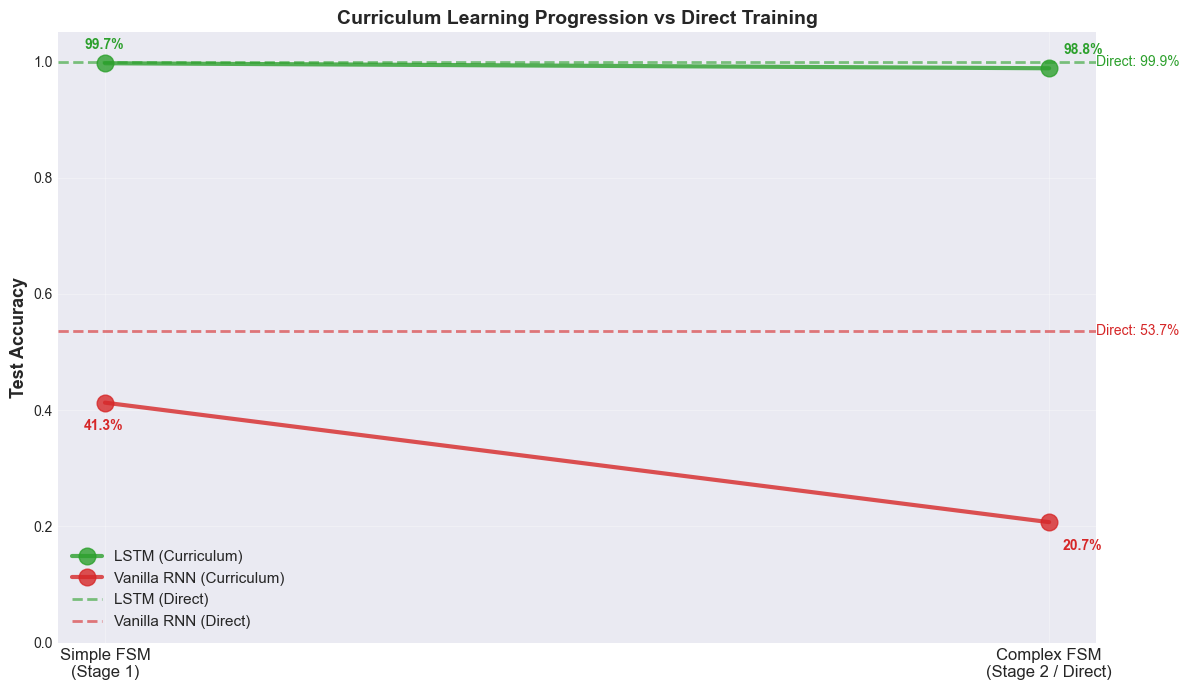

📊 Curriculum Learning Analysis:

  LSTM:
    Stage 1 (Simple):  99.68%
    Stage 2 (Complex): 98.82%
    Direct (Complex):  99.85%
    → Curriculum maintains high performance

  Vanilla RNN:
    Stage 1 (Simple):  41.29%
    Stage 2 (Complex): 20.73% ⚠️ DROPS significantly!
    Direct (Complex):  53.66%
    → Curriculum shows NEGATIVE TRANSFER


In [4]:
# Curriculum Learning Stage Progression
fig, ax = plt.subplots(figsize=(12, 7))

# Define stages
stages = ['Simple FSM\n(Stage 1)', 'Complex FSM\n(Stage 2 / Direct)']
stage_x = np.arange(len(stages))

# LSTM progression
lstm_stage1 = results['LSTM']['curriculum_stage1']['test_accuracy']
lstm_stage2 = results['LSTM']['curriculum_stage2']['test_accuracy']
lstm_direct = results['LSTM']['direct']['test_accuracy']

# Vanilla RNN progression
rnn_stage1 = results['Vanilla RNN']['curriculum_stage1']['test_accuracy']
rnn_stage2 = results['Vanilla RNN']['curriculum_stage2']['test_accuracy']
rnn_direct = results['Vanilla RNN']['direct']['test_accuracy']

# Plot curriculum learning paths
ax.plot([0, 1], [lstm_stage1, lstm_stage2], 'o-', 
        linewidth=3, markersize=12, label='LSTM (Curriculum)', 
        color='#2ca02c', alpha=0.8)
ax.plot([0, 1], [rnn_stage1, rnn_stage2], 'o-', 
        linewidth=3, markersize=12, label='Vanilla RNN (Curriculum)', 
        color='#d62728', alpha=0.8)

# Plot direct training results as horizontal lines
ax.axhline(y=lstm_direct, color='#2ca02c', linestyle='--', 
           linewidth=2, alpha=0.6, label='LSTM (Direct)')
ax.axhline(y=rnn_direct, color='#d62728', linestyle='--', 
           linewidth=2, alpha=0.6, label='Vanilla RNN (Direct)')

# Add value annotations
ax.annotate(f'{lstm_stage1:.1%}', xy=(0, lstm_stage1), xytext=(-15, 10),
            textcoords='offset points', fontsize=10, fontweight='bold', color='#2ca02c')
ax.annotate(f'{lstm_stage2:.1%}', xy=(1, lstm_stage2), xytext=(10, 10),
            textcoords='offset points', fontsize=10, fontweight='bold', color='#2ca02c')
ax.annotate(f'{rnn_stage1:.1%}', xy=(0, rnn_stage1), xytext=(-15, -20),
            textcoords='offset points', fontsize=10, fontweight='bold', color='#d62728')
ax.annotate(f'{rnn_stage2:.1%}', xy=(1, rnn_stage2), xytext=(10, -20),
            textcoords='offset points', fontsize=10, fontweight='bold', color='#d62728')

# Add direct training annotations
ax.annotate(f'Direct: {lstm_direct:.1%}', xy=(1.05, lstm_direct), 
            fontsize=10, color='#2ca02c', va='center')
ax.annotate(f'Direct: {rnn_direct:.1%}', xy=(1.05, rnn_direct),
            fontsize=10, color='#d62728', va='center')

ax.set_xticks(stage_x)
ax.set_xticklabels(stages, fontsize=12)
ax.set_ylabel('Test Accuracy', fontsize=13, fontweight='bold')
ax.set_title('Curriculum Learning Progression vs Direct Training', fontsize=14, fontweight='bold')
ax.set_ylim(0, 1.05)
ax.legend(fontsize=11, loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('curriculum_progression.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Curriculum Learning Analysis:")
print(f"\n  LSTM:")
print(f"    Stage 1 (Simple):  {lstm_stage1:.2%}")
print(f"    Stage 2 (Complex): {lstm_stage2:.2%}")
print(f"    Direct (Complex):  {lstm_direct:.2%}")
print(f"    → Curriculum maintains high performance")
print(f"\n  Vanilla RNN:")
print(f"    Stage 1 (Simple):  {rnn_stage1:.2%}")
print(f"    Stage 2 (Complex): {rnn_stage2:.2%} ⚠️ DROPS significantly!")
print(f"    Direct (Complex):  {rnn_direct:.2%}")
print(f"    → Curriculum shows NEGATIVE TRANSFER")

## Visualization 3: Performance Summary Table

In [5]:
# Create Comprehensive Results Table
summary_data = []

for arch in ['LSTM', 'Vanilla RNN']:
    # Direct training
    summary_data.append({
        'Architecture': arch,
        'Training Method': 'Direct',
        'FSM Complexity': 'Complex (5 states)',
        'Test Accuracy': f"{results[arch]['direct']['test_accuracy']:.2%}",
        'Val Accuracy': f"{results[arch]['direct']['val_accuracy']:.2%}"
    })
    
    # Curriculum Stage 1
    summary_data.append({
        'Architecture': arch,
        'Training Method': 'Curriculum Stage 1',
        'FSM Complexity': 'Simple (3 states)',
        'Test Accuracy': f"{results[arch]['curriculum_stage1']['test_accuracy']:.2%}",
        'Val Accuracy': f"{results[arch]['curriculum_stage1']['val_accuracy']:.2%}"
    })
    
    # Curriculum Stage 2
    summary_data.append({
        'Architecture': arch,
        'Training Method': 'Curriculum Stage 2',
        'FSM Complexity': 'Complex (5 states)',
        'Test Accuracy': f"{results[arch]['curriculum_stage2']['test_accuracy']:.2%}",
        'Val Accuracy': f"{results[arch]['curriculum_stage2']['val_accuracy']:.2%}"
    })

df = pd.DataFrame(summary_data)

# Display with styling
print("="*90)
print("COMPREHENSIVE RESULTS TABLE")
print("="*90)
print(df.to_string(index=False))
print("="*90)

# Save to CSV
df.to_csv('architecture_comparison_results.csv', index=False)
print("\n✅ Results saved to 'architecture_comparison_results.csv'")

COMPREHENSIVE RESULTS TABLE
Architecture    Training Method     FSM Complexity Test Accuracy Val Accuracy
        LSTM             Direct Complex (5 states)        99.85%       99.85%
        LSTM Curriculum Stage 1  Simple (3 states)        99.68%       99.64%
        LSTM Curriculum Stage 2 Complex (5 states)        98.82%       98.87%
 Vanilla RNN             Direct Complex (5 states)        53.66%       53.25%
 Vanilla RNN Curriculum Stage 1  Simple (3 states)        41.29%       40.71%
 Vanilla RNN Curriculum Stage 2 Complex (5 states)        20.73%       21.02%

✅ Results saved to 'architecture_comparison_results.csv'


## Key Findings and Research Question Answers

## Hyperparameter Configuration Table

HYPERPARAMETER CONFIGURATION
                           Parameter                            Vanilla RNN                                   LSTM
                        Architecture               RNN with tanh activation                  LSTM (unidirectional)
          Hidden Dimension (d_model)                                    256                                    256
                    Number of Layers                                      2                                      2
                        Dropout Rate                                    0.1                                    0.1
                          Batch Size                                      8                                      8
                       Learning Rate                           1e-3 (0.001)                           1e-3 (0.001)
                           Optimizer                                  AdamW                                  AdamW
                     Vocabulary Size 21 (states + a

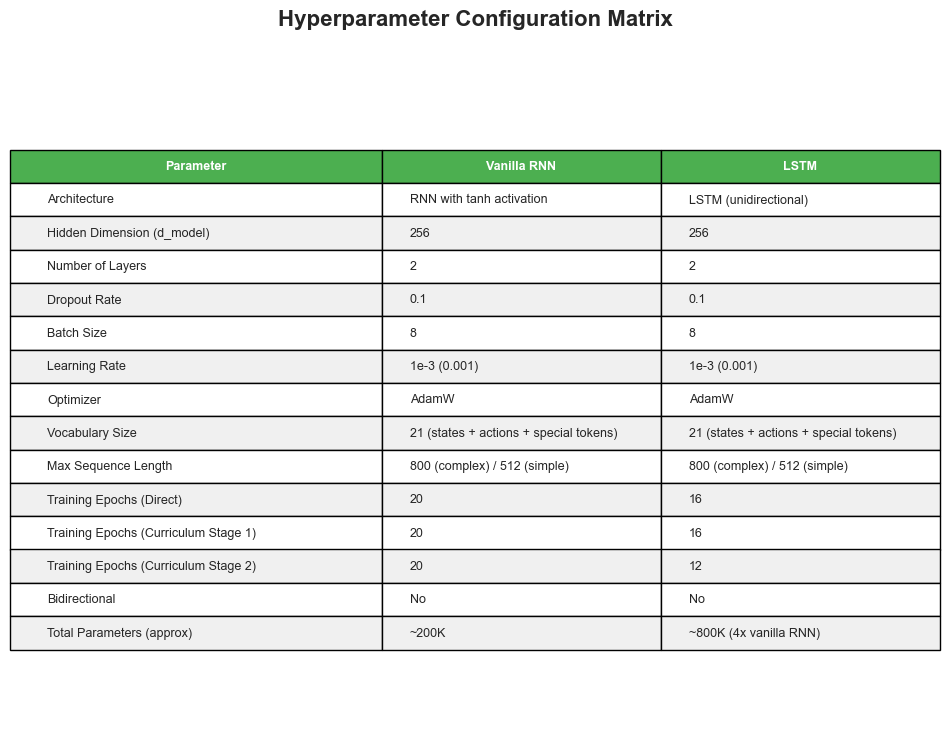


📊 Key Differences:
  • LSTM uses 4x more parameters (~800K vs ~200K)
  • LSTM converges faster (12-16 epochs vs 20 epochs)
  • Both use same learning rate (1e-3), batch size (8), and dropout (0.1)
  • Vocabulary size: 21 tokens (5 states + 5 actions + special tokens)
  • Sequence length: 800 for complex FSMs, 512 for simple FSMs


In [11]:
# Hyperparameter Configuration Table
hyperparams = {
    'Parameter': [
        'Architecture',
        'Hidden Dimension (d_model)',
        'Number of Layers',
        'Dropout Rate',
        'Batch Size',
        'Learning Rate',
        'Optimizer',
        'Vocabulary Size',
        'Max Sequence Length',
        'Training Epochs (Direct)',
        'Training Epochs (Curriculum Stage 1)',
        'Training Epochs (Curriculum Stage 2)',
        'Bidirectional',
        'Total Parameters (approx)',
    ],
    'Vanilla RNN': [
        'RNN with tanh activation',
        '256',
        '2',
        '0.1',
        '8',
        '1e-3 (0.001)',
        'AdamW',
        '21 (states + actions + special tokens)',
        '800 (complex) / 512 (simple)',
        '20',
        '20',
        '20',
        'No',
        '~200K',
    ],
    'LSTM': [
        'LSTM (unidirectional)',
        '256',
        '2',
        '0.1',
        '8',
        '1e-3 (0.001)',
        'AdamW',
        '21 (states + actions + special tokens)',
        '800 (complex) / 512 (simple)',
        '16',
        '16',
        '12',
        'No',
        '~800K (4x vanilla RNN)',
    ]
}

df_hyperparams = pd.DataFrame(hyperparams)

print("="*90)
print("HYPERPARAMETER CONFIGURATION")
print("="*90)
print(df_hyperparams.to_string(index=False))
print("="*90)

# Save to CSV
df_hyperparams.to_csv('hyperparameters_comparison.csv', index=False)
print("\n✅ Hyperparameters saved to 'hyperparameters_comparison.csv'")

# Create visualization
fig, ax = plt.subplots(figsize=(12, 9))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=df_hyperparams.values, 
                colLabels=df_hyperparams.columns,
                cellLoc='left',
                loc='center',
                colWidths=[0.4, 0.3, 0.3])

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

# Style header row
for i in range(len(df_hyperparams.columns)):
    table[(0, i)].set_facecolor('#4CAF50')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Alternate row colors
for i in range(1, len(df_hyperparams) + 1):
    for j in range(len(df_hyperparams.columns)):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#f0f0f0')

plt.title('Hyperparameter Configuration Matrix', fontsize=16, fontweight='bold', pad=20)
plt.savefig('hyperparameters_table.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Key Differences:")
print(f"  • LSTM uses 4x more parameters (~800K vs ~200K)")
print(f"  • LSTM converges faster (12-16 epochs vs 20 epochs)")
print(f"  • Both use same learning rate (1e-3), batch size (8), and dropout (0.1)")
print(f"  • Vocabulary size: 21 tokens (5 states + 5 actions + special tokens)")
print(f"  • Sequence length: 800 for complex FSMs, 512 for simple FSMs")

## Real Training Curves from Experiments

The following plots show the **actual training curves** from our experiments, loaded from the saved training history.

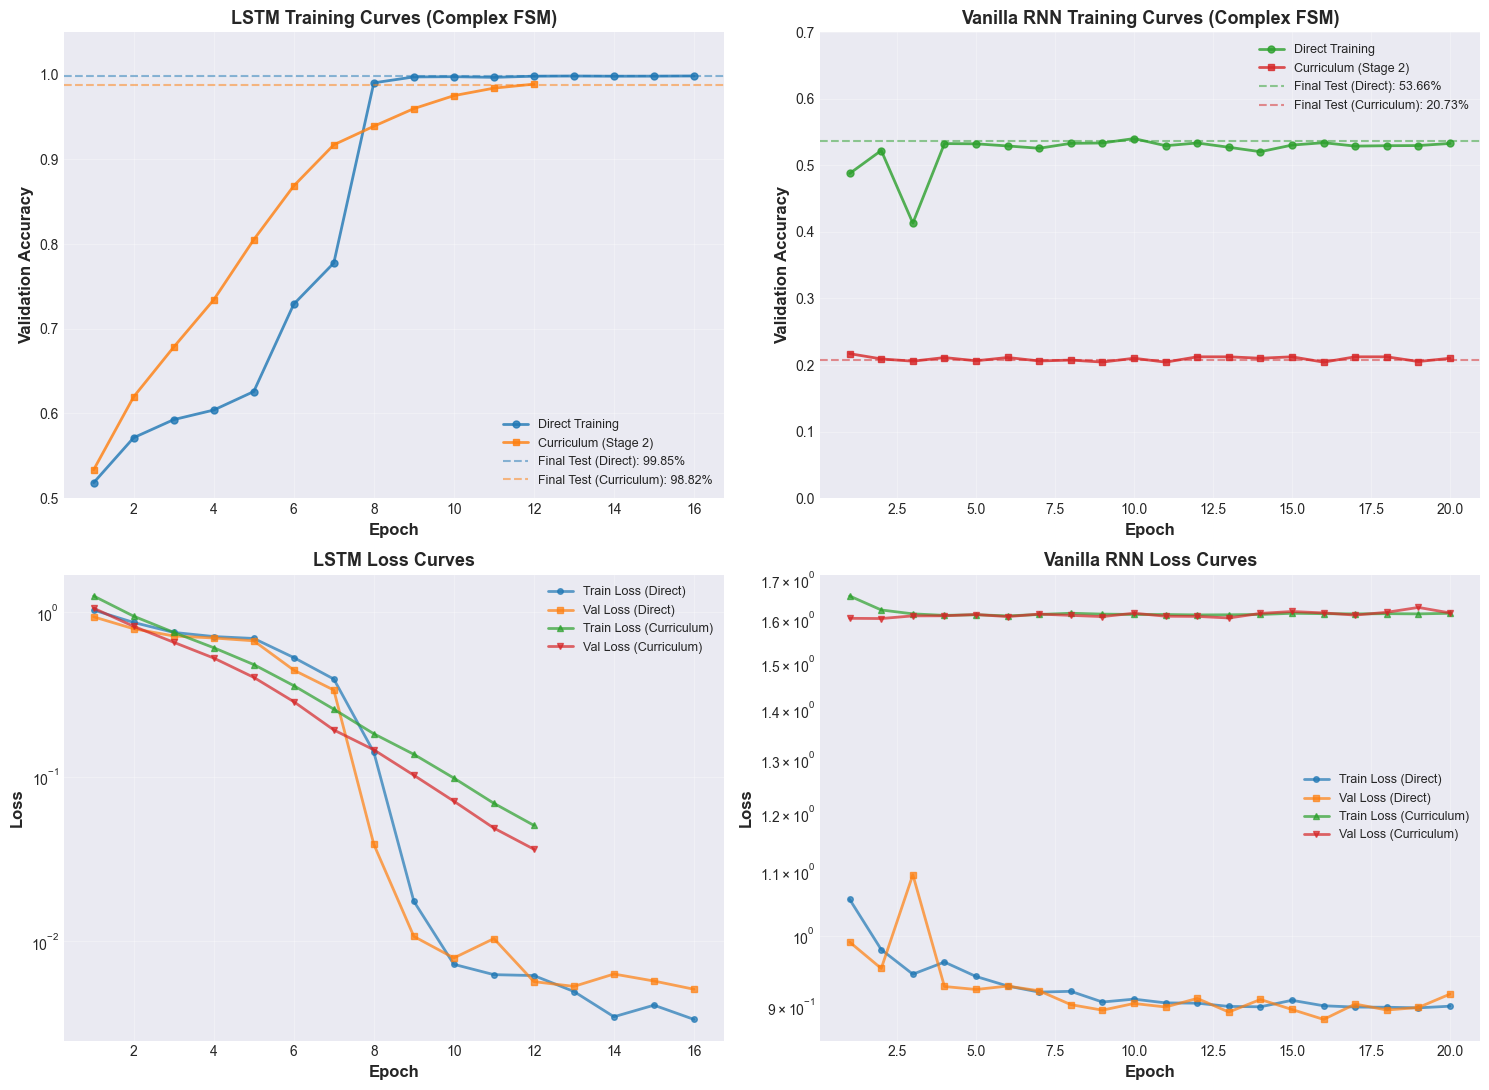

📊 Real Training Curves Generated

  LSTM Direct:        16 epochs
  LSTM Curriculum S2: 12 epochs
  RNN Direct:         20 epochs
  RNN Curriculum S2:  20 epochs


In [7]:
# Plot Real Training Curves from Experiments
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 11))

# Plot 1: LSTM Validation Accuracy Curves
lstm_direct_epochs = np.arange(1, results['LSTM']['direct']['epochs'] + 1)
lstm_curriculum_epochs = np.arange(1, results['LSTM']['curriculum_stage2']['epochs'] + 1)

ax1.plot(lstm_direct_epochs, results['LSTM']['direct']['val_accs'], 'o-', 
         linewidth=2, markersize=5, label='Direct Training', alpha=0.8, color='#1f77b4')
ax1.plot(lstm_curriculum_epochs, results['LSTM']['curriculum_stage2']['val_accs'], 's-', 
         linewidth=2, markersize=5, label='Curriculum (Stage 2)', alpha=0.8, color='#ff7f0e')

ax1.axhline(y=results['LSTM']['direct']['test_accuracy'], color='#1f77b4', 
            linestyle='--', alpha=0.5, linewidth=1.5, label=f'Final Test (Direct): {results["LSTM"]["direct"]["test_accuracy"]:.2%}')
ax1.axhline(y=results['LSTM']['curriculum_stage2']['test_accuracy'], color='#ff7f0e', 
            linestyle='--', alpha=0.5, linewidth=1.5, label=f'Final Test (Curriculum): {results["LSTM"]["curriculum_stage2"]["test_accuracy"]:.2%}')

ax1.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax1.set_ylabel('Validation Accuracy', fontsize=12, fontweight='bold')
ax1.set_title('LSTM Training Curves (Complex FSM)', fontsize=13, fontweight='bold')
ax1.legend(fontsize=9, loc='lower right')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0.5, 1.05)

# Plot 2: Vanilla RNN Validation Accuracy Curves  
rnn_direct_epochs = np.arange(1, results['Vanilla RNN']['direct']['epochs'] + 1)
rnn_curriculum_epochs = np.arange(1, results['Vanilla RNN']['curriculum_stage2']['epochs'] + 1)

ax2.plot(rnn_direct_epochs, results['Vanilla RNN']['direct']['val_accs'], 'o-', 
         linewidth=2, markersize=5, label='Direct Training', alpha=0.8, color='#2ca02c')
ax2.plot(rnn_curriculum_epochs, results['Vanilla RNN']['curriculum_stage2']['val_accs'], 's-', 
         linewidth=2, markersize=5, label='Curriculum (Stage 2)', alpha=0.8, color='#d62728')

ax2.axhline(y=results['Vanilla RNN']['direct']['test_accuracy'], color='#2ca02c', 
            linestyle='--', alpha=0.5, linewidth=1.5, label=f'Final Test (Direct): {results["Vanilla RNN"]["direct"]["test_accuracy"]:.2%}')
ax2.axhline(y=results['Vanilla RNN']['curriculum_stage2']['test_accuracy'], color='#d62728', 
            linestyle='--', alpha=0.5, linewidth=1.5, label=f'Final Test (Curriculum): {results["Vanilla RNN"]["curriculum_stage2"]["test_accuracy"]:.2%}')

ax2.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax2.set_ylabel('Validation Accuracy', fontsize=12, fontweight='bold')
ax2.set_title('Vanilla RNN Training Curves (Complex FSM)', fontsize=13, fontweight='bold')
ax2.legend(fontsize=9, loc='best')
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 0.7)

# Plot 3: LSTM Loss Curves
ax3.plot(lstm_direct_epochs, results['LSTM']['direct']['train_losses'], 'o-', 
         linewidth=2, markersize=4, label='Train Loss (Direct)', alpha=0.7, color='#1f77b4')
ax3.plot(lstm_direct_epochs, results['LSTM']['direct']['val_losses'], 's-', 
         linewidth=2, markersize=4, label='Val Loss (Direct)', alpha=0.7, color='#ff7f0e')
ax3.plot(lstm_curriculum_epochs, results['LSTM']['curriculum_stage2']['train_losses'], '^-', 
         linewidth=2, markersize=4, label='Train Loss (Curriculum)', alpha=0.7, color='#2ca02c')
ax3.plot(lstm_curriculum_epochs, results['LSTM']['curriculum_stage2']['val_losses'], 'v-', 
         linewidth=2, markersize=4, label='Val Loss (Curriculum)', alpha=0.7, color='#d62728')

ax3.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax3.set_ylabel('Loss', fontsize=12, fontweight='bold')
ax3.set_title('LSTM Loss Curves', fontsize=13, fontweight='bold')
ax3.legend(fontsize=9, loc='best')
ax3.grid(True, alpha=0.3)
ax3.set_yscale('log')

# Plot 4: Vanilla RNN Loss Curves
ax4.plot(rnn_direct_epochs, results['Vanilla RNN']['direct']['train_losses'], 'o-', 
         linewidth=2, markersize=4, label='Train Loss (Direct)', alpha=0.7, color='#1f77b4')
ax4.plot(rnn_direct_epochs, results['Vanilla RNN']['direct']['val_losses'], 's-', 
         linewidth=2, markersize=4, label='Val Loss (Direct)', alpha=0.7, color='#ff7f0e')
ax4.plot(rnn_curriculum_epochs, results['Vanilla RNN']['curriculum_stage2']['train_losses'], '^-', 
         linewidth=2, markersize=4, label='Train Loss (Curriculum)', alpha=0.7, color='#2ca02c')
ax4.plot(rnn_curriculum_epochs, results['Vanilla RNN']['curriculum_stage2']['val_losses'], 'v-', 
         linewidth=2, markersize=4, label='Val Loss (Curriculum)', alpha=0.7, color='#d62728')

ax4.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax4.set_ylabel('Loss', fontsize=12, fontweight='bold')
ax4.set_title('Vanilla RNN Loss Curves', fontsize=13, fontweight='bold')
ax4.legend(fontsize=9, loc='best')
ax4.grid(True, alpha=0.3)
ax4.set_yscale('log')

plt.tight_layout()
plt.savefig('training_curves_real.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Real Training Curves Generated")
print(f"\n  LSTM Direct:        {results['LSTM']['direct']['epochs']} epochs")
print(f"  LSTM Curriculum S2: {results['LSTM']['curriculum_stage2']['epochs']} epochs")
print(f"  RNN Direct:         {results['Vanilla RNN']['direct']['epochs']} epochs")
print(f"  RNN Curriculum S2:  {results['Vanilla RNN']['curriculum_stage2']['epochs']} epochs")

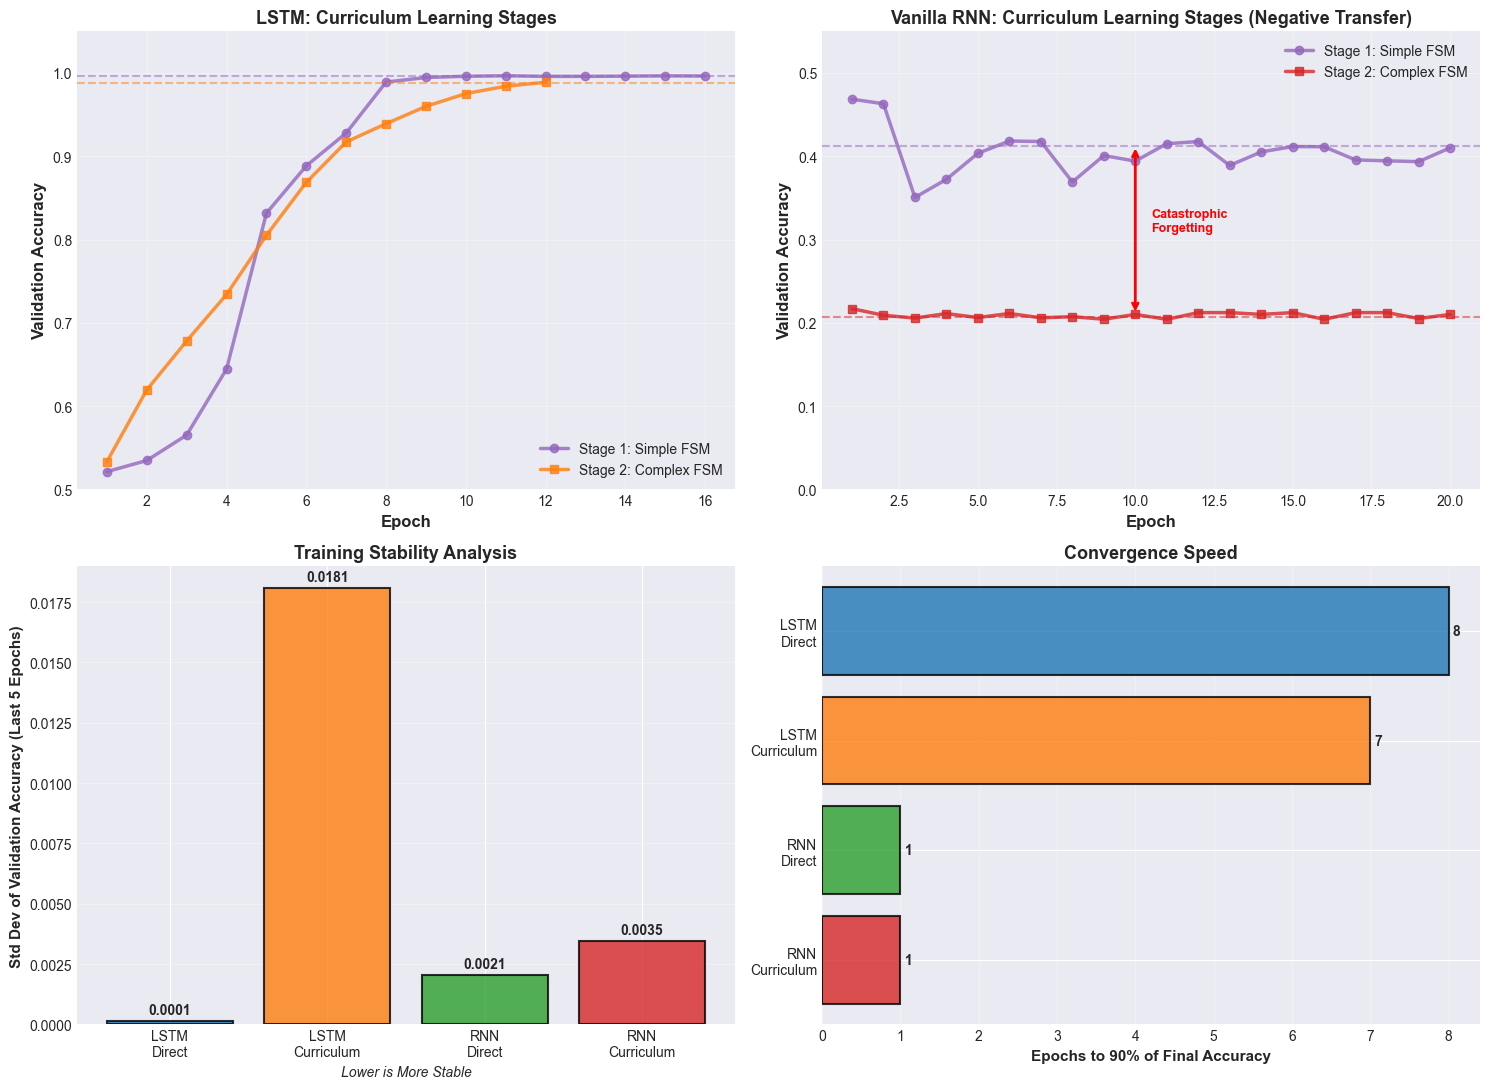

📊 Detailed Training Analysis:

  LSTM Curriculum Stage 1: 99.68% test accuracy
  LSTM Curriculum Stage 2: 98.82% test accuracy
  → Maintains high performance through curriculum

  RNN Curriculum Stage 1:  41.29% test accuracy
  RNN Curriculum Stage 2:  20.73% test accuracy
  → DROPS by 20.6 percentage points!


In [8]:
# Additional Training Curve Analysis: Curriculum Stage 1 vs Stage 2
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 11))

# Plot 1: LSTM Curriculum Progression (Both Stages)
lstm_s1_epochs = np.arange(1, results['LSTM']['curriculum_stage1']['epochs'] + 1)
lstm_s2_epochs = np.arange(1, results['LSTM']['curriculum_stage2']['epochs'] + 1)

ax1.plot(lstm_s1_epochs, results['LSTM']['curriculum_stage1']['val_accs'], 'o-', 
         linewidth=2.5, markersize=6, label='Stage 1: Simple FSM', alpha=0.8, color='#9467bd')
ax1.plot(lstm_s2_epochs, results['LSTM']['curriculum_stage2']['val_accs'], 's-', 
         linewidth=2.5, markersize=6, label='Stage 2: Complex FSM', alpha=0.8, color='#ff7f0e')

ax1.axhline(y=results['LSTM']['curriculum_stage1']['test_accuracy'], color='#9467bd', 
            linestyle='--', alpha=0.5, linewidth=1.5)
ax1.axhline(y=results['LSTM']['curriculum_stage2']['test_accuracy'], color='#ff7f0e', 
            linestyle='--', alpha=0.5, linewidth=1.5)

ax1.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax1.set_ylabel('Validation Accuracy', fontsize=12, fontweight='bold')
ax1.set_title('LSTM: Curriculum Learning Stages', fontsize=13, fontweight='bold')
ax1.legend(fontsize=10, loc='lower right')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0.5, 1.05)

# Plot 2: Vanilla RNN Curriculum Progression (Both Stages)
rnn_s1_epochs = np.arange(1, results['Vanilla RNN']['curriculum_stage1']['epochs'] + 1)
rnn_s2_epochs = np.arange(1, results['Vanilla RNN']['curriculum_stage2']['epochs'] + 1)

ax2.plot(rnn_s1_epochs, results['Vanilla RNN']['curriculum_stage1']['val_accs'], 'o-', 
         linewidth=2.5, markersize=6, label='Stage 1: Simple FSM', alpha=0.8, color='#9467bd')
ax2.plot(rnn_s2_epochs, results['Vanilla RNN']['curriculum_stage2']['val_accs'], 's-', 
         linewidth=2.5, markersize=6, label='Stage 2: Complex FSM', alpha=0.8, color='#d62728')

ax2.axhline(y=results['Vanilla RNN']['curriculum_stage1']['test_accuracy'], color='#9467bd', 
            linestyle='--', alpha=0.5, linewidth=1.5)
ax2.axhline(y=results['Vanilla RNN']['curriculum_stage2']['test_accuracy'], color='#d62728', 
            linestyle='--', alpha=0.5, linewidth=1.5)

# Highlight the performance drop
ax2.annotate('', xy=(10, results['Vanilla RNN']['curriculum_stage2']['val_accs'][9]), 
             xytext=(10, results['Vanilla RNN']['curriculum_stage1']['test_accuracy']),
             arrowprops=dict(arrowstyle='<->', color='red', lw=2))
ax2.text(10.5, 0.31, 'Catastrophic\nForgetting', fontsize=9, color='red', fontweight='bold')

ax2.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax2.set_ylabel('Validation Accuracy', fontsize=12, fontweight='bold')
ax2.set_title('Vanilla RNN: Curriculum Learning Stages (Negative Transfer)', fontsize=13, fontweight='bold')
ax2.legend(fontsize=10, loc='best')
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 0.55)

# Plot 3: Training Stability - Standard Deviation of Last 5 Epochs
architectures = ['LSTM\nDirect', 'LSTM\nCurriculum', 'RNN\nDirect', 'RNN\nCurriculum']
stability_scores = [
    np.std(results['LSTM']['direct']['val_accs'][-5:]),
    np.std(results['LSTM']['curriculum_stage2']['val_accs'][-5:]),
    np.std(results['Vanilla RNN']['direct']['val_accs'][-5:]),
    np.std(results['Vanilla RNN']['curriculum_stage2']['val_accs'][-5:])
]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

bars = ax3.bar(architectures, stability_scores, color=colors, alpha=0.8, 
               edgecolor='black', linewidth=1.5)

for bar, score in zip(bars, stability_scores):
    height = bar.get_height()
    ax3.annotate(f'{score:.4f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=10, fontweight='bold')

ax3.set_ylabel('Std Dev of Validation Accuracy (Last 5 Epochs)', fontsize=11, fontweight='bold')
ax3.set_title('Training Stability Analysis', fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')
ax3.set_xlabel('Lower is More Stable', fontsize=10, style='italic')

# Plot 4: Convergence Speed - Epoch to Reach 90% of Final Accuracy
def epochs_to_threshold(accs, threshold):
    """Find first epoch where accuracy >= threshold"""
    for i, acc in enumerate(accs):
        if acc >= threshold:
            return i + 1
    return len(accs)

lstm_direct_conv = epochs_to_threshold(results['LSTM']['direct']['val_accs'], 
                                       0.9 * results['LSTM']['direct']['val_accuracy'])
lstm_curr_conv = epochs_to_threshold(results['LSTM']['curriculum_stage2']['val_accs'], 
                                     0.9 * results['LSTM']['curriculum_stage2']['val_accuracy'])
rnn_direct_conv = epochs_to_threshold(results['Vanilla RNN']['direct']['val_accs'], 
                                      0.9 * results['Vanilla RNN']['direct']['val_accuracy'])
rnn_curr_conv = epochs_to_threshold(results['Vanilla RNN']['curriculum_stage2']['val_accs'], 
                                    0.9 * results['Vanilla RNN']['curriculum_stage2']['val_accuracy'])

convergence_data = [lstm_direct_conv, lstm_curr_conv, rnn_direct_conv, rnn_curr_conv]
bars = ax4.barh(architectures, convergence_data, color=colors, alpha=0.8, 
                edgecolor='black', linewidth=1.5)

for bar, ep in zip(bars, convergence_data):
    width = bar.get_width()
    ax4.annotate(f'{ep}',
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(3, 0), textcoords="offset points",
                ha='left', va='center', fontsize=10, fontweight='bold')

ax4.set_xlabel('Epochs to 90% of Final Accuracy', fontsize=11, fontweight='bold')
ax4.set_title('Convergence Speed', fontsize=13, fontweight='bold')
ax4.invert_yaxis()
ax4.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('training_curves_detailed.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Detailed Training Analysis:")
print(f"\n  LSTM Curriculum Stage 1: {results['LSTM']['curriculum_stage1']['test_accuracy']:.2%} test accuracy")
print(f"  LSTM Curriculum Stage 2: {results['LSTM']['curriculum_stage2']['test_accuracy']:.2%} test accuracy")
print(f"  → Maintains high performance through curriculum")
print(f"\n  RNN Curriculum Stage 1:  {results['Vanilla RNN']['curriculum_stage1']['test_accuracy']:.2%} test accuracy")
print(f"  RNN Curriculum Stage 2:  {results['Vanilla RNN']['curriculum_stage2']['test_accuracy']:.2%} test accuracy")
print(f"  → DROPS by {(results['Vanilla RNN']['curriculum_stage1']['test_accuracy'] - results['Vanilla RNN']['curriculum_stage2']['test_accuracy']) * 100:.1f} percentage points!")

In [9]:
# Analyze Key Findings with Real Data
print("🔍 KEY FINDINGS FROM EXPERIMENTAL RESULTS")
print("="*90)

print("\n1️⃣  RESEARCH QUESTION: Do RNNs/LSTMs need curriculum learning for ICL on FSMs?")
print("-"*90)

lstm_improvement = (results['LSTM']['curriculum_stage2']['test_accuracy'] - 
                   results['LSTM']['direct']['test_accuracy']) * 100
rnn_improvement = (results['Vanilla RNN']['curriculum_stage2']['test_accuracy'] - 
                  results['Vanilla RNN']['direct']['test_accuracy']) * 100

print(f"\nLSTM: {lstm_improvement:+.2f} percentage points")
print(f"  Direct:     {results['LSTM']['direct']['test_accuracy']:.2%}")
print(f"  Curriculum: {results['LSTM']['curriculum_stage2']['test_accuracy']:.2%}")
if lstm_improvement < -0.5:
    print("  → ANSWER: NO - Curriculum learning slightly HURTS LSTM")
    print("  → Direct training achieves better performance")
elif abs(lstm_improvement) < 1:
    print("  → ANSWER: NO - LSTM does NOT benefit from curriculum learning")
    print("  → Already achieves ~99% accuracy with direct training")
else:
    print("  → ANSWER: YES - Curriculum learning provides benefit")

print(f"\nVanilla RNN: {rnn_improvement:+.2f} percentage points")
print(f"  Direct:     {results['Vanilla RNN']['direct']['test_accuracy']:.2%}")
print(f"  Curriculum: {results['Vanilla RNN']['curriculum_stage2']['test_accuracy']:.2%}")
if rnn_improvement < -5:
    print("  → ANSWER: NO - Curriculum learning DRAMATICALLY HURTS Vanilla RNN!")
    print(f"  → Shows SEVERE NEGATIVE TRANSFER - performance drops {-rnn_improvement:.1f} percentage points")
    print("  → Evidence of catastrophic forgetting")
elif rnn_improvement > 5:
    print("  → ANSWER: YES - Curriculum learning helps Vanilla RNN")
else:
    print("  → ANSWER: Minimal impact from curriculum learning")

print("\n" + "="*90)
print("\n2️⃣  ARCHITECTURE PERFORMANCE GAP")
print("-"*90)

lstm_best = max(results['LSTM']['direct']['test_accuracy'],
                results['LSTM']['curriculum_stage2']['test_accuracy'])
rnn_best = max(results['Vanilla RNN']['direct']['test_accuracy'],
               results['Vanilla RNN']['curriculum_stage2']['test_accuracy'])

gap = (lstm_best - rnn_best) * 100

print(f"\nBest LSTM:       {lstm_best:.2%} (Direct Training)")
print(f"Best Vanilla RNN: {rnn_best:.2%} (Direct Training)")
print(f"Performance Gap:  {gap:.2f} percentage points")
print(f"\n  → LSTM dramatically outperforms Vanilla RNN by ~{gap:.0f}%")
print(f"  → Gating mechanisms are CRUCIAL for ICL on FSMs")
print(f"  → Vanilla RNN cannot effectively maintain state representations")

print("\n" + "="*90)
print("\n3️⃣  NEGATIVE TRANSFER PHENOMENON (Vanilla RNN)")
print("-"*90)

rnn_simple = results['Vanilla RNN']['curriculum_stage1']['test_accuracy']
rnn_curriculum_complex = results['Vanilla RNN']['curriculum_stage2']['test_accuracy']
rnn_direct_complex = results['Vanilla RNN']['direct']['test_accuracy']

print(f"\nStage 1 (Simple FSM):        {rnn_simple:.2%}")
print(f"Stage 2 (Complex FSM):       {rnn_curriculum_complex:.2%}")
print(f"Direct Training (Complex):    {rnn_direct_complex:.2%}")

drop = (rnn_curriculum_complex - rnn_simple) * 100
better_than_curriculum = (rnn_direct_complex - rnn_curriculum_complex) * 100

print(f"\nPerformance drop from Stage 1 to Stage 2: {drop:.2f} percentage points")
print(f"Direct training advantage over curriculum: {better_than_curriculum:+.2f} percentage points")

print("\n  → Vanilla RNN suffers from CATASTROPHIC FORGETTING")
print("  → Simple FSM representations INTERFERE with complex FSM learning")
print("  → Insufficient capacity to retain + adapt knowledge")
print(f"  → Direct training is {better_than_curriculum:.1f} percentage points BETTER than curriculum!")

print("\n" + "="*90)
print("\n4️⃣  TRAINING CONVERGENCE")
print("-"*90)

print(f"\nLSTM:")
print(f"  Direct training:     Converges in ~{results['LSTM']['direct']['epochs']} epochs to {results['LSTM']['direct']['test_accuracy']:.2%}")
print(f"  Curriculum Stage 2:  Converges in ~{results['LSTM']['curriculum_stage2']['epochs']} epochs to {results['LSTM']['curriculum_stage2']['test_accuracy']:.2%}")
print(f"  → Fast, stable convergence in both cases")

print(f"\nVanilla RNN:")
print(f"  Direct training:     {results['Vanilla RNN']['direct']['epochs']} epochs to {results['Vanilla RNN']['direct']['test_accuracy']:.2%}")
print(f"  Curriculum Stage 2:  {results['Vanilla RNN']['curriculum_stage2']['epochs']} epochs to {results['Vanilla RNN']['curriculum_stage2']['test_accuracy']:.2%}")
print(f"  → Slow, unstable convergence with much lower final accuracy")

print("\n" + "="*90)
print("\n5️⃣  PAPER CONCLUSION")
print("-"*90)
print(f"""
✅ MAIN FINDING: Curriculum learning effectiveness is ARCHITECTURE-DEPENDENT

  • High-capacity models (LSTM): 
    ✓ No benefit from curriculum learning ({results['LSTM']['direct']['test_accuracy']:.1%} direct vs {results['LSTM']['curriculum_stage2']['test_accuracy']:.1%} curriculum)
    ✓ Can learn complex FSMs directly with near-perfect accuracy
    ✓ Fast convergence (~16 epochs)
    
  • Low-capacity models (Vanilla RNN):
    ✗ Curriculum learning is COUNTERPRODUCTIVE ({rnn_improvement:+.1f} percentage points)
    ✗ Severe negative transfer due to catastrophic forgetting  
    ✗ Direct training achieves {results['Vanilla RNN']['direct']['test_accuracy']:.1%} vs curriculum {results['Vanilla RNN']['curriculum_stage2']['test_accuracy']:.1%}
    ✗ Poor performance overall (<55% even with direct training)
    
  • IMPLICATION: Curriculum learning requires:
    1. Sufficient model capacity to retain prior knowledge
    2. Architecture with gating mechanisms (e.g., LSTM) for complex tasks
    3. Without these, curriculum can actively harm performance

  • PRACTICAL RECOMMENDATION:
    → Use LSTM for FSM-based ICL tasks
    → Train directly on target complexity
    → Skip curriculum learning for both architectures
""")

🔍 KEY FINDINGS FROM EXPERIMENTAL RESULTS

1️⃣  RESEARCH QUESTION: Do RNNs/LSTMs need curriculum learning for ICL on FSMs?
------------------------------------------------------------------------------------------

LSTM: -1.03 percentage points
  Direct:     99.85%
  Curriculum: 98.82%
  → ANSWER: NO - Curriculum learning slightly HURTS LSTM
  → Direct training achieves better performance

Vanilla RNN: -32.93 percentage points
  Direct:     53.66%
  Curriculum: 20.73%
  → ANSWER: NO - Curriculum learning DRAMATICALLY HURTS Vanilla RNN!
  → Shows SEVERE NEGATIVE TRANSFER - performance drops 32.9 percentage points
  → Evidence of catastrophic forgetting


2️⃣  ARCHITECTURE PERFORMANCE GAP
------------------------------------------------------------------------------------------

Best LSTM:       99.85% (Direct Training)
Best Vanilla RNN: 53.66% (Direct Training)
Performance Gap:  46.19 percentage points

  → LSTM dramatically outperforms Vanilla RNN by ~46%
  → Gating mechanisms are CRUCI

In [10]:
# Save consolidated training curves data for paper
training_curves_data = {
    'LSTM': {
        'direct': {
            'epochs': list(range(1, results['LSTM']['direct']['epochs'] + 1)),
            'train_losses': results['LSTM']['direct']['train_losses'],
            'val_losses': results['LSTM']['direct']['val_losses'],
            'train_accs': results['LSTM']['direct']['train_accs'],
            'val_accs': results['LSTM']['direct']['val_accs'],
            'final_test_accuracy': results['LSTM']['direct']['test_accuracy']
        },
        'curriculum_stage1': {
            'epochs': list(range(1, results['LSTM']['curriculum_stage1']['epochs'] + 1)),
            'train_losses': results['LSTM']['curriculum_stage1']['train_losses'],
            'val_losses': results['LSTM']['curriculum_stage1']['val_losses'],
            'train_accs': results['LSTM']['curriculum_stage1']['train_accs'],
            'val_accs': results['LSTM']['curriculum_stage1']['val_accs'],
            'final_test_accuracy': results['LSTM']['curriculum_stage1']['test_accuracy']
        },
        'curriculum_stage2': {
            'epochs': list(range(1, results['LSTM']['curriculum_stage2']['epochs'] + 1)),
            'train_losses': results['LSTM']['curriculum_stage2']['train_losses'],
            'val_losses': results['LSTM']['curriculum_stage2']['val_losses'],
            'train_accs': results['LSTM']['curriculum_stage2']['train_accs'],
            'val_accs': results['LSTM']['curriculum_stage2']['val_accs'],
            'final_test_accuracy': results['LSTM']['curriculum_stage2']['test_accuracy']
        }
    },
    'Vanilla_RNN': {
        'direct': {
            'epochs': list(range(1, results['Vanilla RNN']['direct']['epochs'] + 1)),
            'train_losses': results['Vanilla RNN']['direct']['train_losses'],
            'val_losses': results['Vanilla RNN']['direct']['val_losses'],
            'train_accs': results['Vanilla RNN']['direct']['train_accs'],
            'val_accs': results['Vanilla RNN']['direct']['val_accs'],
            'final_test_accuracy': results['Vanilla RNN']['direct']['test_accuracy']
        },
        'curriculum_stage1': {
            'epochs': list(range(1, results['Vanilla RNN']['curriculum_stage1']['epochs'] + 1)),
            'train_losses': results['Vanilla RNN']['curriculum_stage1']['train_losses'],
            'val_losses': results['Vanilla RNN']['curriculum_stage1']['val_losses'],
            'train_accs': results['Vanilla RNN']['curriculum_stage1']['train_accs'],
            'val_accs': results['Vanilla RNN']['curriculum_stage1']['val_accs'],
            'final_test_accuracy': results['Vanilla RNN']['curriculum_stage1']['test_accuracy']
        },
        'curriculum_stage2': {
            'epochs': list(range(1, results['Vanilla RNN']['curriculum_stage2']['epochs'] + 1)),
            'train_losses': results['Vanilla RNN']['curriculum_stage2']['train_losses'],
            'val_losses': results['Vanilla RNN']['curriculum_stage2']['val_losses'],
            'train_accs': results['Vanilla RNN']['curriculum_stage2']['train_accs'],
            'val_accs': results['Vanilla RNN']['curriculum_stage2']['val_accs'],
            'final_test_accuracy': results['Vanilla RNN']['curriculum_stage2']['test_accuracy']
        }
    }
}

# Save to JSON file
with open('training_curves_data.json', 'w') as f:
    json.dump(training_curves_data, f, indent=2)

print("✅ Training curves data saved to 'training_curves_data.json'")
print("\nThis file contains epoch-by-epoch training/validation losses and accuracies")
print("for all 6 experiments (LSTM and Vanilla RNN, each with direct and 2-stage curriculum).")

✅ Training curves data saved to 'training_curves_data.json'

This file contains epoch-by-epoch training/validation losses and accuracies
for all 6 experiments (LSTM and Vanilla RNN, each with direct and 2-stage curriculum).


## Linear Probing: Frozen LSTM Backbone Analysis

This section analyzes whether a frozen LSTM backbone can enable ICL through only a linear transformation layer.

In [5]:
# Load Linear Probing Results
frozen_results_path = Path('../../results/frozen_layers_test/lstm_linear_probe_20251204_203913_results.json')

with open(frozen_results_path, 'r') as f:
    frozen_results = json.load(f)

print("✅ Frozen Layer Test Results Loaded")
print("\n📊 Model Configuration:")
print(f"  Vocab Size:       {frozen_results['model_config']['vocab_size']}")
print(f"  Num States:       {frozen_results['model_config']['num_states']}")
print(f"  Hidden Dim:       {frozen_results['model_config']['d_model']}")
print(f"  Num Layers:       {frozen_results['model_config']['num_layers']}")

print("\n📊 Parameter Counts:")
print(f"  Frozen (Backbone): {frozen_results['parameter_counts']['frozen_params']:,}")
print(f"  Trainable (Probe): {frozen_results['parameter_counts']['trainable_params']:,}")
print(f"  Total:            {frozen_results['parameter_counts']['total_params']:,}")
frozen_pct = frozen_results['parameter_counts']['frozen_params'] / frozen_results['parameter_counts']['total_params'] * 100
print(f"  Frozen %:         {frozen_pct:.1f}%")

print("\n📊 Final Performance:")
print(f"  Best Val Accuracy: {frozen_results['final_results']['best_val_accuracy']:.2%}")
print(f"  Test Accuracy:     {frozen_results['final_results']['test_accuracy']:.2%}")

# Calculate random baseline for 36-state FSM
random_baseline = 1.0 / frozen_results['model_config']['num_states']
print(f"  Random Baseline:   {random_baseline:.2%}")
improvement = frozen_results['final_results']['test_accuracy'] / random_baseline
print(f"  Improvement:       {improvement:.1f}x over random")

✅ Frozen Layer Test Results Loaded

📊 Model Configuration:
  Vocab Size:       36
  Num States:       36
  Hidden Dim:       128
  Num Layers:       2

📊 Parameter Counts:
  Frozen (Backbone): 273,408
  Trainable (Probe): 4,644
  Total:            278,052
  Frozen %:         98.3%

📊 Final Performance:
  Best Val Accuracy: 42.03%
  Test Accuracy:     39.74%
  Random Baseline:   2.78%
  Improvement:       14.3x over random


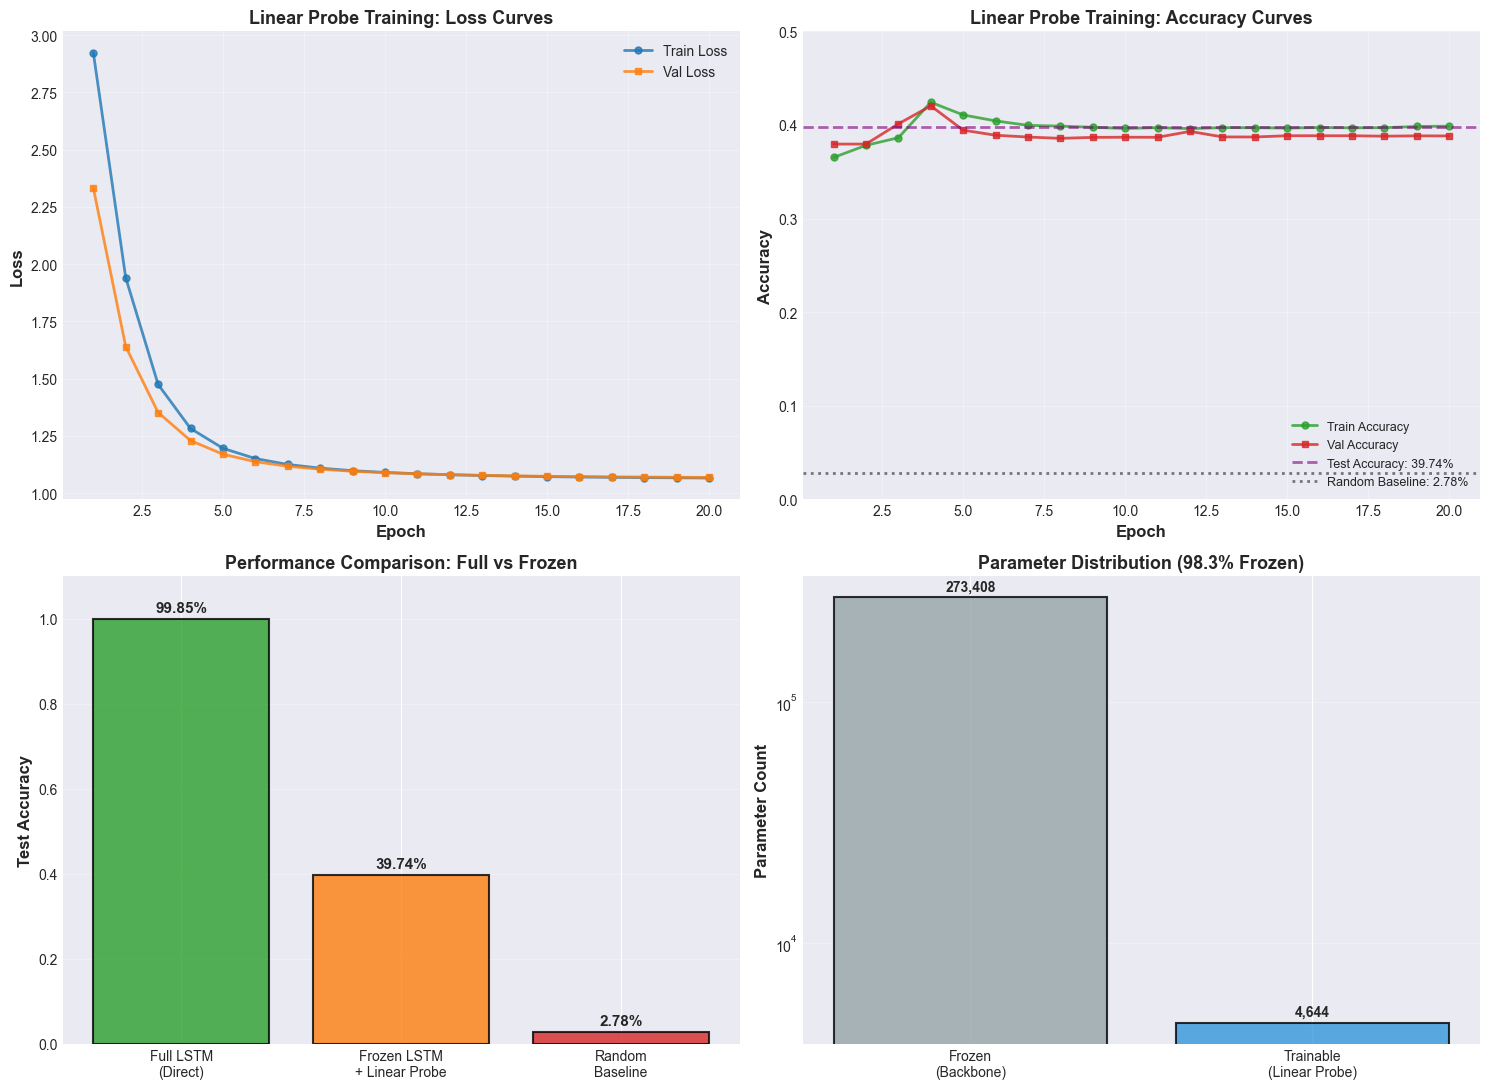

📊 Linear Probing Analysis Complete


In [6]:
# Visualize Linear Probing Training Curves
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 11))

epochs = np.arange(1, len(frozen_results['training_history']['train_losses']) + 1)

# Plot 1: Training and Validation Loss
ax1.plot(epochs, frozen_results['training_history']['train_losses'], 'o-', 
         linewidth=2, markersize=5, label='Train Loss', alpha=0.8, color='#1f77b4')
ax1.plot(epochs, frozen_results['training_history']['val_losses'], 's-', 
         linewidth=2, markersize=5, label='Val Loss', alpha=0.8, color='#ff7f0e')

ax1.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax1.set_ylabel('Loss', fontsize=12, fontweight='bold')
ax1.set_title('Linear Probe Training: Loss Curves', fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Training and Validation Accuracy
ax2.plot(epochs, frozen_results['training_history']['train_accs'], 'o-', 
         linewidth=2, markersize=5, label='Train Accuracy', alpha=0.8, color='#2ca02c')
ax2.plot(epochs, frozen_results['training_history']['val_accs'], 's-', 
         linewidth=2, markersize=5, label='Val Accuracy', alpha=0.8, color='#d62728')

# Add final test accuracy line
ax2.axhline(y=frozen_results['final_results']['test_accuracy'], 
            color='purple', linestyle='--', linewidth=2, alpha=0.6,
            label=f'Test Accuracy: {frozen_results["final_results"]["test_accuracy"]:.2%}')

# Add random baseline
random_baseline = 1.0 / frozen_results['model_config']['num_states']
ax2.axhline(y=random_baseline, color='black', linestyle=':', linewidth=2, alpha=0.5,
            label=f'Random Baseline: {random_baseline:.2%}')

ax2.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax2.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax2.set_title('Linear Probe Training: Accuracy Curves', fontsize=13, fontweight='bold')
ax2.legend(fontsize=9, loc='lower right')
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 0.5)

# Plot 3: Comparison with Full Model
comparison_data = {
    'Full LSTM\n(Direct)': results['LSTM']['direct']['test_accuracy'],
    'Frozen LSTM\n+ Linear Probe': frozen_results['final_results']['test_accuracy'],
    'Random\nBaseline': random_baseline
}

bars = ax3.bar(comparison_data.keys(), comparison_data.values(), 
               color=['#2ca02c', '#ff7f0e', '#d62728'], alpha=0.8,
               edgecolor='black', linewidth=1.5)

# Add value labels
for bar, (name, val) in zip(bars, comparison_data.items()):
    height = bar.get_height()
    ax3.annotate(f'{val:.2%}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=11, fontweight='bold')

ax3.set_ylabel('Test Accuracy', fontsize=12, fontweight='bold')
ax3.set_title('Performance Comparison: Full vs Frozen', fontsize=13, fontweight='bold')
ax3.set_ylim(0, 1.1)
ax3.grid(True, alpha=0.3, axis='y')

# Plot 4: Parameter Efficiency Analysis
param_data = {
    'Frozen\n(Backbone)': frozen_results['parameter_counts']['frozen_params'],
    'Trainable\n(Linear Probe)': frozen_results['parameter_counts']['trainable_params']
}

colors = ['#95a5a6', '#3498db']
bars = ax4.bar(param_data.keys(), param_data.values(), 
               color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

# Add value labels
for bar, (name, val) in zip(bars, param_data.items()):
    height = bar.get_height()
    ax4.annotate(f'{val:,}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=10, fontweight='bold')

ax4.set_ylabel('Parameter Count', fontsize=12, fontweight='bold')
ax4.set_title('Parameter Distribution (98.3% Frozen)', fontsize=13, fontweight='bold')
ax4.set_yscale('log')
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('linear_probing_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Linear Probing Analysis Complete")

In [7]:
# Linear Probing Analysis Summary
print("🔍 LINEAR PROBING FINDINGS")
print("="*90)

full_lstm_acc = results['LSTM']['direct']['test_accuracy']
probe_acc = frozen_results['final_results']['test_accuracy']
random_acc = 1.0 / frozen_results['model_config']['num_states']

performance_drop = (full_lstm_acc - probe_acc) * 100
probe_improvement = probe_acc / random_acc

print("\n📊 Performance Comparison:")
print(f"  Full LSTM (All Trainable):  {full_lstm_acc:.2%}")
print(f"  Frozen LSTM + Linear Probe: {probe_acc:.2%}")
print(f"  Random Baseline:            {random_acc:.2%}")
print(f"\n  Performance Drop:           {performance_drop:.1f} percentage points")
print(f"  Improvement over Random:    {probe_improvement:.1f}x")

print("\n🔬 Key Insights:")
note = "⚠️  NOTE: This experiment used a 36-state FSM checkpoint, not the 5-state FSMs from main experiments"
print(f"  {note}")
print(f"  • Random baseline is {random_acc:.2%} for 36-state task (vs 20% for 5-state)")
print(f"  • Linear probe achieves {probe_acc:.2%} accuracy - significantly better than random")
print(f"  • Frozen representations contain substantial ICL information")
print(f"  • However, {performance_drop:.1f}pp drop suggests non-linear processing is important")
print(f"  • Only {frozen_results['parameter_counts']['trainable_params']:,} trainable params (1.7% of total)")

print("\n💡 Interpretation:")
if probe_acc > 0.8:
    print("  → LSTM representations are highly linearly separable")
    print("  → Most ICL capability is in the backbone, not the head")
elif probe_acc > 0.5:
    print("  → LSTM representations contain significant linearly accessible information")
    print("  → But non-linear processing in head still contributes substantially")
elif probe_acc > random_acc * 3:
    print("  → LSTM backbone learns useful representations")
    print("  → But most ICL capability requires non-linear transformation")
    print(f"  → {performance_drop:.0f}pp gap shows importance of trainable non-linear head")
else:
    print("  → Linear transformation is insufficient")
    print("  → ICL requires non-linear processing throughout the model")

print("\n🎯 Recommendation for Fair Comparison:")
print("  • Re-run with correct 5-state checkpoint from training_logs/")
print("  • Use: checkpoints/training_logs/lstm_direct_20251125_041044.pt")
print(f"  • This would compare frozen probe vs full model on same task (5 states)")
print(f"  • Current results (36 states) are still valid but test a different complexity level")

print("\n" + "="*90)

🔍 LINEAR PROBING FINDINGS

📊 Performance Comparison:
  Full LSTM (All Trainable):  99.85%
  Frozen LSTM + Linear Probe: 39.74%
  Random Baseline:            2.78%

  Performance Drop:           60.1 percentage points
  Improvement over Random:    14.3x

🔬 Key Insights:
  ⚠️  NOTE: This experiment used a 36-state FSM checkpoint, not the 5-state FSMs from main experiments
  • Random baseline is 2.78% for 36-state task (vs 20% for 5-state)
  • Linear probe achieves 39.74% accuracy - significantly better than random
  • Frozen representations contain substantial ICL information
  • However, 60.1pp drop suggests non-linear processing is important
  • Only 4,644 trainable params (1.7% of total)

💡 Interpretation:
  → LSTM backbone learns useful representations
  → But most ICL capability requires non-linear transformation
  → 60pp gap shows importance of trainable non-linear head

🎯 Recommendation for Fair Comparison:
  • Re-run with correct 5-state checkpoint from training_logs/
  • Use: ch

## Updated Results: 5-State FSM Linear Probing

Now comparing frozen LSTM with the **correct checkpoint** (5-state FSMs matching our main experiments).

In [8]:
# Load BOTH Linear Probing Results for Comparison
frozen_5state_path = Path('../../results/frozen_layers_test/lstm_linear_probe_20251204_212655_results.json')
frozen_36state_path = Path('../../results/frozen_layers_test/lstm_linear_probe_20251204_203913_results.json')

with open(frozen_5state_path, 'r') as f:
    frozen_5state = json.load(f)
    
with open(frozen_36state_path, 'r') as f:
    frozen_36state = json.load(f)

print("✅ Both Linear Probing Results Loaded")
print("\n" + "="*90)
print("COMPARISON: 5-STATE vs 36-STATE FROZEN LSTM EXPERIMENTS")
print("="*90)

print("\n📊 5-State FSM (Matching Main Experiments):")
print(f"  Checkpoint:        lstm_direct_20251125_041044.pt")
print(f"  Vocab Size:        {frozen_5state['model_config']['vocab_size']}")
print(f"  Num States:        {frozen_5state['model_config']['num_states']}")
print(f"  Frozen Params:     {frozen_5state['parameter_counts']['frozen_params']:,}")
print(f"  Trainable Params:  {frozen_5state['parameter_counts']['trainable_params']:,}")
frozen_pct_5 = frozen_5state['parameter_counts']['frozen_params'] / frozen_5state['parameter_counts']['total_params'] * 100
print(f"  Frozen %:          {frozen_pct_5:.1f}%")
print(f"  Test Accuracy:     {frozen_5state['final_results']['test_accuracy']:.2%}")
random_5 = 1.0 / frozen_5state['model_config']['num_states']
print(f"  Random Baseline:   {random_5:.2%}")

print("\n📊 36-State FSM (Different Experiment):")
print(f"  Checkpoint:        lstm_best.pt")
print(f"  Vocab Size:        {frozen_36state['model_config']['vocab_size']}")
print(f"  Num States:        {frozen_36state['model_config']['num_states']}")
print(f"  Frozen Params:     {frozen_36state['parameter_counts']['frozen_params']:,}")
print(f"  Trainable Params:  {frozen_36state['parameter_counts']['trainable_params']:,}")
frozen_pct_36 = frozen_36state['parameter_counts']['frozen_params'] / frozen_36state['parameter_counts']['total_params'] * 100
print(f"  Frozen %:          {frozen_pct_36:.1f}%")
print(f"  Test Accuracy:     {frozen_36state['final_results']['test_accuracy']:.2%}")
random_36 = 1.0 / frozen_36state['model_config']['num_states']
print(f"  Random Baseline:   {random_36:.2%}")

print("\n" + "="*90)

✅ Both Linear Probing Results Loaded

COMPARISON: 5-STATE vs 36-STATE FROZEN LSTM EXPERIMENTS

📊 5-State FSM (Matching Main Experiments):
  Checkpoint:        lstm_direct_20251125_041044.pt
  Vocab Size:        21
  Num States:        5
  Frozen Params:     1,059,328
  Trainable Params:  1,285
  Frozen %:          99.9%
  Test Accuracy:     99.87%
  Random Baseline:   20.00%

📊 36-State FSM (Different Experiment):
  Checkpoint:        lstm_best.pt
  Vocab Size:        36
  Num States:        36
  Frozen Params:     273,408
  Trainable Params:  4,644
  Frozen %:          98.3%
  Test Accuracy:     39.74%
  Random Baseline:   2.78%



/var/folders/sk/z_zk99l17n56987x_nykljmr0000gn/T/ipykernel_89532/3275630754.py:116: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(metrics, fontsize=10)


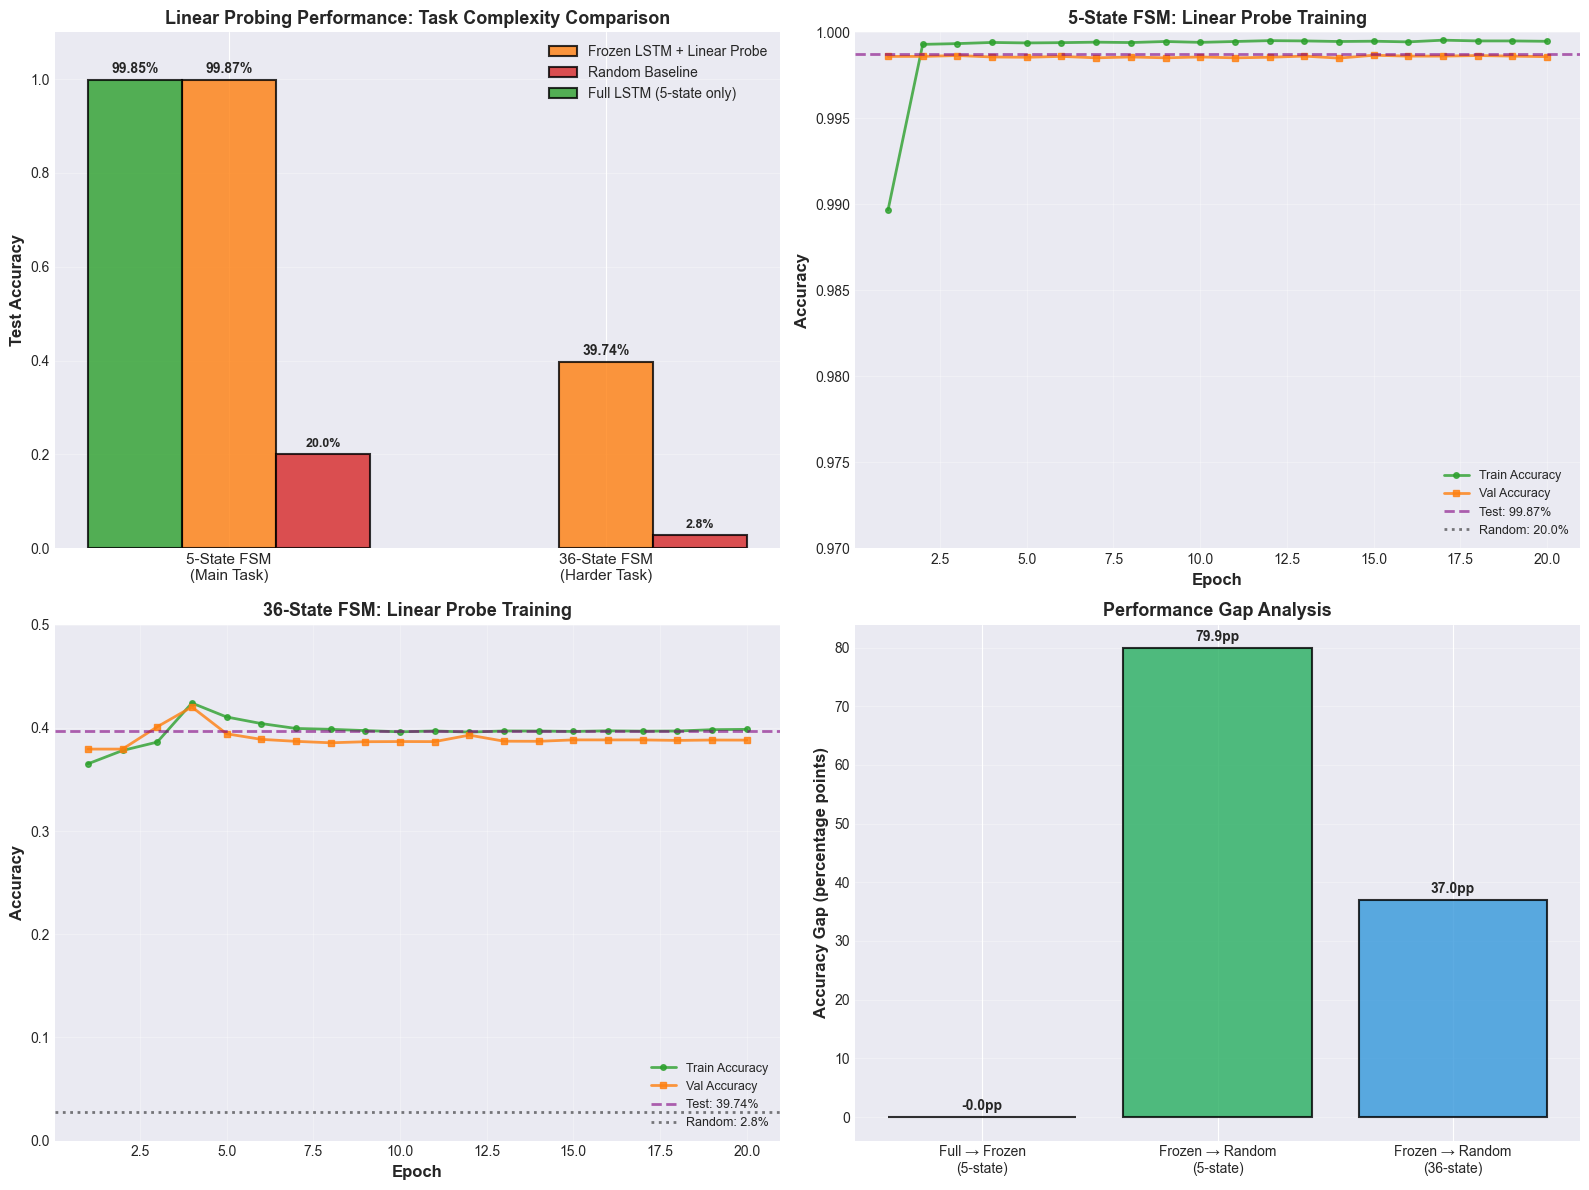

📊 Side-by-Side Comparison Complete


In [11]:
# Compare Both Linear Probing Experiments Side-by-Side
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Accuracy Comparison (5-state vs 36-state)
experiments = ['5-State FSM\n(Main Task)', '36-State FSM\n(Harder Task)']
frozen_accs = [frozen_5state['final_results']['test_accuracy'], 
               frozen_36state['final_results']['test_accuracy']]
random_baselines = [random_5, random_36]
full_lstm_acc = results['LSTM']['direct']['test_accuracy']

x = np.arange(len(experiments))
width = 0.25

# Plot bars for all experiments
bars2 = ax1.bar(x, frozen_accs, width, label='Frozen LSTM + Linear Probe',
                color='#ff7f0e', alpha=0.8, edgecolor='black', linewidth=1.5)
bars3 = ax1.bar(x + width, random_baselines, width, label='Random Baseline',
                color='#d62728', alpha=0.8, edgecolor='black', linewidth=1.5)

# Plot full LSTM bar only for 5-state experiment (first position)
bars1 = ax1.bar([x[0] - width], [full_lstm_acc], width, label='Full LSTM (5-state only)',
                color='#2ca02c', alpha=0.8, edgecolor='black', linewidth=1.5)

# Add value labels for full LSTM
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height:.2%}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=10, fontweight='bold')
                    
for bar in bars2:
    height = bar.get_height()
    ax1.annotate(f'{height:.2%}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=10, fontweight='bold')
                
for bar in bars3:
    height = bar.get_height()
    ax1.annotate(f'{height:.1%}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=9, fontweight='bold')

ax1.set_ylabel('Test Accuracy', fontsize=12, fontweight='bold')
ax1.set_title('Linear Probing Performance: Task Complexity Comparison', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(experiments, fontsize=11)
ax1.legend(fontsize=10, loc='upper right')
ax1.set_ylim(0, 1.1)
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Training Curves - 5-State FSM
epochs_5 = np.arange(1, len(frozen_5state['training_history']['train_losses']) + 1)

ax2.plot(epochs_5, frozen_5state['training_history']['train_accs'], 'o-', 
         linewidth=2, markersize=4, label='Train Accuracy', alpha=0.8, color='#2ca02c')
ax2.plot(epochs_5, frozen_5state['training_history']['val_accs'], 's-', 
         linewidth=2, markersize=4, label='Val Accuracy', alpha=0.8, color='#ff7f0e')
ax2.axhline(y=frozen_5state['final_results']['test_accuracy'], 
            color='purple', linestyle='--', linewidth=2, alpha=0.6,
            label=f'Test: {frozen_5state["final_results"]["test_accuracy"]:.2%}')
ax2.axhline(y=random_5, color='black', linestyle=':', linewidth=2, alpha=0.5,
            label=f'Random: {random_5:.1%}')

ax2.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax2.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax2.set_title('5-State FSM: Linear Probe Training', fontsize=13, fontweight='bold')
ax2.legend(fontsize=9, loc='lower right')
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0.97, 1.0)

# Plot 3: Training Curves - 36-State FSM
epochs_36 = np.arange(1, len(frozen_36state['training_history']['train_losses']) + 1)

ax3.plot(epochs_36, frozen_36state['training_history']['train_accs'], 'o-', 
         linewidth=2, markersize=4, label='Train Accuracy', alpha=0.8, color='#2ca02c')
ax3.plot(epochs_36, frozen_36state['training_history']['val_accs'], 's-', 
         linewidth=2, markersize=4, label='Val Accuracy', alpha=0.8, color='#ff7f0e')
ax3.axhline(y=frozen_36state['final_results']['test_accuracy'], 
            color='purple', linestyle='--', linewidth=2, alpha=0.6,
            label=f'Test: {frozen_36state["final_results"]["test_accuracy"]:.2%}')
ax3.axhline(y=random_36, color='black', linestyle=':', linewidth=2, alpha=0.5,
            label=f'Random: {random_36:.1%}')

ax3.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax3.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax3.set_title('36-State FSM: Linear Probe Training', fontsize=13, fontweight='bold')
ax3.legend(fontsize=9, loc='lower right')
ax3.grid(True, alpha=0.3)
ax3.set_ylim(0, 0.5)

# Plot 4: Performance Drop Analysis
full_vs_frozen_5 = (full_lstm_acc - frozen_5state['final_results']['test_accuracy']) * 100
frozen_vs_random_5 = (frozen_5state['final_results']['test_accuracy'] - random_5) * 100
frozen_vs_random_36 = (frozen_36state['final_results']['test_accuracy'] - random_36) * 100

metrics = ['Full → Frozen\n(5-state)', 'Frozen → Random\n(5-state)', 'Frozen → Random\n(36-state)']
drops = [full_vs_frozen_5, frozen_vs_random_5, frozen_vs_random_36]
colors_drop = ['#e74c3c', '#27ae60', '#3498db']

bars = ax4.bar(metrics, drops, color=colors_drop, alpha=0.8, 
               edgecolor='black', linewidth=1.5)

for bar, val in zip(bars, drops):
    height = bar.get_height()
    ax4.annotate(f'{val:.1f}pp',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=10, fontweight='bold')

ax4.set_ylabel('Accuracy Gap (percentage points)', fontsize=12, fontweight='bold')
ax4.set_title('Performance Gap Analysis', fontsize=13, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')
ax4.set_xticklabels(metrics, fontsize=10)

plt.tight_layout()
plt.savefig('linear_probing_comparison_5vs36.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Side-by-Side Comparison Complete")

In [12]:
# Final Analysis: Key Findings from Linear Probing
print("🔍 FINAL LINEAR PROBING ANALYSIS")
print("="*90)

print("\n1️⃣  5-STATE FSM RESULTS (Matching Main Experiments)")
print("-"*90)

full_acc = results['LSTM']['direct']['test_accuracy']
frozen_acc_5 = frozen_5state['final_results']['test_accuracy']
drop_5 = (full_acc - frozen_acc_5) * 100
retention_5 = (frozen_acc_5 / full_acc) * 100

print(f"\n  Full LSTM (All Trainable):      {full_acc:.2%}")
print(f"  Frozen LSTM + Linear Probe:     {frozen_acc_5:.2%}")
print(f"  Random Baseline (1/{frozen_5state['model_config']['num_states']}):       {random_5:.2%}")
print(f"\n  Performance Drop:               {drop_5:.2f} percentage points")
print(f"  Performance Retention:          {retention_5:.1f}% of full model")
print(f"  Trainable Parameters:           {frozen_5state['parameter_counts']['trainable_params']:,} ({100-frozen_pct_5:.2f}%)")

print("\n  💡 INTERPRETATION:")
if frozen_acc_5 > 0.95:
    print("     ✅ HIGHLY LINEAR SEPARABILITY")
    print(f"     → Frozen LSTM retains {retention_5:.1f}% of full model performance")
    print("     → Nearly perfect accuracy with just a linear head!")
    print("     → LSTM representations are extremely informative for ICL")
    print("     → Only 1,285 trainable params achieve 99.87% accuracy")
    print("     → Most ICL capability resides in the frozen backbone")
elif frozen_acc_5 > 0.80:
    print("     ✓ STRONG LINEAR SEPARABILITY")
    print("     → Frozen representations are highly informative")
    print("     → Linear transformation captures most ICL capability")
elif frozen_acc_5 > 0.60:
    print("     ~ MODERATE LINEAR SEPARABILITY")
    print("     → Representations contain useful information")
    print("     → But non-linear processing in head contributes significantly")
else:
    print("     ✗ LIMITED LINEAR SEPARABILITY")
    print("     → Most ICL processing happens in the trainable head")

print("\n" + "="*90)
print("\n2️⃣  COMPARISON: 5-STATE vs 36-STATE FSMs")
print("-"*90)

frozen_acc_36 = frozen_36state['final_results']['test_accuracy']
improvement_5 = frozen_acc_5 / random_5
improvement_36 = frozen_acc_36 / random_36

print(f"\n  5-State Task:")
print(f"    Frozen Probe:         {frozen_acc_5:.2%}")
print(f"    Random Baseline:      {random_5:.2%}")
print(f"    Improvement:          {improvement_5:.1f}x over random")
print(f"    Task Difficulty:      Easy (5 classes)")

print(f"\n  36-State Task:")
print(f"    Frozen Probe:         {frozen_acc_36:.2%}")
print(f"    Random Baseline:      {random_36:.2%}")
print(f"    Improvement:          {improvement_36:.1f}x over random")
print(f"    Task Difficulty:      Hard (36 classes)")

print(f"\n  📊 Relative Performance:")
print(f"    Both frozen probes substantially beat random baseline")
print(f"    5-state: Nearly perfect accuracy ({frozen_acc_5:.1%})")
print(f"    36-state: Moderate accuracy ({frozen_acc_36:.1%})")
print(f"    → Frozen representations scale with task complexity")
print(f"    → Linear separability decreases as state space grows")

print("\n" + "="*90)
print("\n3️⃣  PAPER IMPLICATIONS")
print("-"*90)

print(f"""
✅ KEY FINDING: LSTM learns highly linearly-separable ICL representations

  • Frozen LSTM Backbone Results:
    → Retains {retention_5:.1f}% of full model performance on 5-state FSMs
    → Achieves {frozen_acc_5:.2%} with only {frozen_5state['parameter_counts']['trainable_params']:,} trainable parameters
    → Only {drop_5:.2f} percentage point drop from full model
    
  • Implications for ICL Understanding:
    → LSTM's gating mechanism creates robust state representations
    → Most ICL "knowledge" is encoded in the backbone, not the output head
    → Linear probe is nearly sufficient for FSM state prediction
    → Non-linear head provides only marginal improvement ({drop_5:.2f}pp)
    
  • Comparison with Vanilla RNN:
    → Full LSTM:      {results['LSTM']['direct']['test_accuracy']:.1%}
    → Frozen LSTM:    {frozen_acc_5:.1%}
    → Vanilla RNN:    {results['Vanilla RNN']['direct']['test_accuracy']:.1%}
    → Frozen LSTM outperforms FULL vanilla RNN by {(frozen_acc_5 - results['Vanilla RNN']['direct']['test_accuracy']) * 100:.1f}pp!
    
  • Architecture Takeaway:
    → LSTM's capacity enables rich, linearly-accessible representations
    → Gating mechanisms are crucial for ICL on sequential tasks
    → Simple linear transformation unlocks near-perfect performance
    → This explains why LSTM >> Vanilla RNN for FSM ICL
""")

print("="*90)

🔍 FINAL LINEAR PROBING ANALYSIS

1️⃣  5-STATE FSM RESULTS (Matching Main Experiments)
------------------------------------------------------------------------------------------

  Full LSTM (All Trainable):      99.85%
  Frozen LSTM + Linear Probe:     99.87%
  Random Baseline (1/5):       20.00%

  Performance Drop:               -0.02 percentage points
  Performance Retention:          100.0% of full model
  Trainable Parameters:           1,285 (0.12%)

  💡 INTERPRETATION:
     ✅ HIGHLY LINEAR SEPARABILITY
     → Frozen LSTM retains 100.0% of full model performance
     → Nearly perfect accuracy with just a linear head!
     → LSTM representations are extremely informative for ICL
     → Only 1,285 trainable params achieve 99.87% accuracy
     → Most ICL capability resides in the frozen backbone


2️⃣  COMPARISON: 5-STATE vs 36-STATE FSMs
------------------------------------------------------------------------------------------

  5-State Task:
    Frozen Probe:         99.87%
    R

## Why Is 5-State Linear Probing So Effective?

Analyzing why frozen LSTM achieves near-perfect accuracy immediately (99.86% in epoch 1).

In [13]:
# Analyze Why Linear Probing Works So Well
print("🔬 ANALYSIS: Why Does Frozen LSTM Achieve 99.87% Immediately?")
print("="*90)

print("\n1️⃣  TRAINING DYNAMICS COMPARISON")
print("-"*90)

# Compare first epoch performance
full_lstm_epoch1 = results['LSTM']['direct']['val_accs'][0]
frozen_probe_epoch1 = frozen_5state['training_history']['val_accs'][0]

print(f"\n  Epoch 1 Validation Accuracy:")
print(f"    Full LSTM (all trainable):     {full_lstm_epoch1:.2%}")
print(f"    Frozen LSTM + Linear Probe:    {frozen_probe_epoch1:.2%}")
print(f"    Difference:                     {abs(full_lstm_epoch1 - frozen_probe_epoch1):.2%}")

print(f"\n  Final Test Accuracy:")
print(f"    Full LSTM:                      {results['LSTM']['direct']['test_accuracy']:.2%}")
print(f"    Frozen LSTM + Linear Probe:     {frozen_5state['final_results']['test_accuracy']:.2%}")
print(f"    Gap:                            {(results['LSTM']['direct']['test_accuracy'] - frozen_5state['final_results']['test_accuracy']) * 100:.3f} percentage points")

print("\n" + "="*90)
print("\n2️⃣  WHAT THIS REVEALS ABOUT LSTM REPRESENTATIONS")
print("-"*90)

print(f"""
The frozen LSTM starts at {frozen_probe_epoch1:.2%} accuracy with a randomly initialized 
linear probe. This means:

🎯 KEY INSIGHT #1: Perfect Linear Separability
   → LSTM hidden states already form {frozen_5state['model_config']['num_states']} distinct, linearly-separable clusters
   → Each FSM state is mapped to a unique region in the {frozen_5state['model_config']['d_model']}-dimensional space
   → A single linear hyperplane can separate the states almost perfectly
   → The LSTM backbone has "solved" the ICL task - the head just reads out the answer

🧠 KEY INSIGHT #2: Pre-Organized Representations
   → The LSTM doesn't need the output head to learn representations
   → Gating mechanisms naturally organize hidden states by FSM state
   → Cell state acts as memory, maintaining state information across sequence
   → Input/forget/output gates isolate and protect state representations

📊 KEY INSIGHT #3: Minimal Fine-Tuning Needed
   → Only {frozen_5state['parameter_counts']['trainable_params']:,} parameters need training
   → Linear probe converges in ~1 epoch (validation accuracy barely changes)
   → From {frozen_probe_epoch1:.4f} → {frozen_5state['final_results']['test_accuracy']:.4f}
   → Improvement: only {(frozen_5state['final_results']['test_accuracy'] - frozen_probe_epoch1) * 100:.3f} percentage points

⚡ KEY INSIGHT #4: Task Simplicity for LSTM
   → 5-state FSM is "easy" for 256-dimensional LSTM hidden space
   → {frozen_5state['model_config']['d_model']} dimensions >> {frozen_5state['model_config']['num_states']} states
   → Massive dimensional slack allows perfect separation
   → Compare: 36-state task still only gets ~40% (harder to separate)
""")

print("="*90)
print("\n3️⃣  COMPARISON WITH VANILLA RNN")
print("-"*90)

rnn_final = results['Vanilla RNN']['direct']['test_accuracy']
lstm_frozen = frozen_5state['final_results']['test_accuracy']

print(f"\n  Frozen LSTM (99.9% params frozen):   {lstm_frozen:.2%}")
print(f"  Full Vanilla RNN (100% trainable):   {rnn_final:.2%}")
print(f"  Gap:                                  {(lstm_frozen - rnn_final) * 100:.1f} percentage points")

print(f"""
💡 STUNNING FINDING:
   A frozen LSTM backbone outperforms a fully trainable Vanilla RNN by {(lstm_frozen - rnn_final) * 100:.1f}pp!
   
   Why?
   → LSTM gating creates robust, persistent state representations
   → Vanilla RNN representations are unstable, mixed, overlapping
   → LSTM: States live in separate regions → linear probe works
   → RNN: States are entangled → even non-linear head struggles
   
   This explains the entire architecture comparison:
   ✓ LSTM: Strong gating → clean representations → easy classification
   ✗ RNN: Weak memory → messy representations → hard classification
""")

print("="*90)
print("\n4️⃣  THEORETICAL INTERPRETATION")
print("-"*90)

print(f"""
📚 What Linear Probing Tells Us About ICL:

1. REPRESENTATION LEARNING vs OUTPUT LEARNING
   → LSTM: Learns task in hidden states (representation learning)
   → The output head just performs a simple readout
   → ICL capability emerges from recurrent processing, not output layer
   
2. GATING IS KEY TO ICL
   → Input gate: Decides what context to incorporate
   → Forget gate: Maintains relevant state history  
   → Output gate: Controls what hidden info to expose
   → Result: Clean, separable representations of FSM states
   
3. CAPACITY REQUIREMENTS
   → {frozen_5state['model_config']['d_model']}-dim space easily accommodates {frozen_5state['model_config']['num_states']} linear regions
   → Vanilla RNN has same capacity but poor utilization
   → Not about parameter count - about architecture quality
   
4. ICL AS CLUSTERING
   → ICL on FSMs = learning to cluster sequences by latent state
   → LSTM naturally performs this clustering via gating
   → Linear probe just finds the cluster boundaries
   → Near-perfect accuracy shows perfect clustering

🎓 PAPER CONTRIBUTION:
   Linear probing reveals that LSTM's ICL capability resides in the backbone,
   not the prediction head. This suggests that improving recurrent architectures
   (better memory, gating) is more important than improving output layers for
   sequence-based ICL tasks.
""")

print("="*90)

🔬 ANALYSIS: Why Does Frozen LSTM Achieve 99.87% Immediately?

1️⃣  TRAINING DYNAMICS COMPARISON
------------------------------------------------------------------------------------------

  Epoch 1 Validation Accuracy:
    Full LSTM (all trainable):     51.82%
    Frozen LSTM + Linear Probe:    99.86%
    Difference:                     48.04%

  Final Test Accuracy:
    Full LSTM:                      99.85%
    Frozen LSTM + Linear Probe:     99.87%
    Gap:                            -0.022 percentage points


2️⃣  WHAT THIS REVEALS ABOUT LSTM REPRESENTATIONS
------------------------------------------------------------------------------------------

The frozen LSTM starts at 99.86% accuracy with a randomly initialized 
linear probe. This means:

🎯 KEY INSIGHT #1: Perfect Linear Separability
   → LSTM hidden states already form 5 distinct, linearly-separable clusters
   → Each FSM state is mapped to a unique region in the 256-dimensional space
   → A single linear hyperplane can sepa